In [1]:
# Librairies personnalisées
from my_functions.common_functions import *
from my_functions.uni_bi_variate_functions import *
from my_functions.machine_learning_common_functions import *
from my_functions.pca_functions import *

from sklearn.experimental import enable_iterative_imputer 
from sklearn.impute import KNNImputer, IterativeImputer

%matplotlib inline

low_memory=False # faible mémoire vive (RAM) pour gérer la lecture de gros fichiers

# Data Load & Merge

## Customers

In [2]:
# Chargement des Data Sets
customers = pd.read_csv('olist_customers_dataset.csv', low_memory=low_memory)

In [3]:
customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


Le data set contient :
	- 99441 lignes et 5 colonnes.
	- 0 valeurs manquantes, ce qui représente 0.0 % du data set.
Voici un sous-échantillon aléatoire :


customer_id                customer_unique_id  \
32552  4e07dd0417777efe5b61679498ca7df1  f7c974c3f336351fc19b2e838f9fb0e2   
8120   573e026da782d51277f320fc94a8d4e8  fee6e134e5709ca3b2496610ad7c4172   

       customer_zip_code_prefix customer_city customer_state  
32552                     72261      brasilia             DF  
8120                      38800   sao gotardo             MG

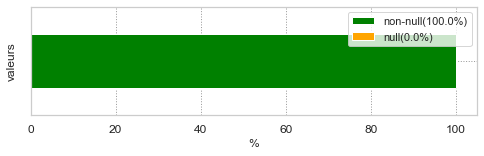

In [4]:
verifier_taille(customers)
afficher_echantillon(customers)

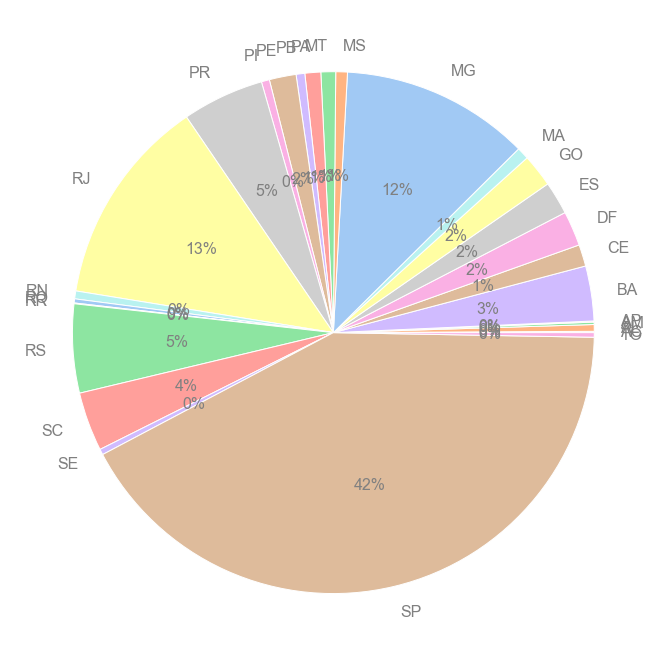

In [5]:
states = customers.groupby('customer_state').count()['customer_unique_id']

colors = sns.color_palette('pastel')
fig, ax = plt.subplots(figsize=(12, 12))
plt.pie(states, labels=states.index.tolist(), colors = colors, autopct = '%0.0f%%', textprops = {'color': 'Gray','fontsize':16})
plt.show()

In [6]:
all_customers = customers.groupby('customer_unique_id').count().sort_values(by='customer_id',ascending=False)
all_customers

customer_id  customer_zip_code_prefix  \
customer_unique_id                                                        
8d50f5eadf50201ccdcedfb9e2ac8455           17                        17   
3e43e6105506432c953e165fb2acf44c            9                         9   
6469f99c1f9dfae7733b25662e7f1782            7                         7   
ca77025e7201e3b30c44b472ff346268            7                         7   
1b6c7548a2a1f9037c1fd3ddfed95f33            7                         7   
...                                       ...                       ...   
5657dfebff5868c4dc7e8355fea865c4            1                         1   
5657596addb4d7b07b32cd330614bdf8            1                         1   
5656eb169546146caeab56c3ffc3d268            1                         1   
5656a8fabc8629ff96b2bc14f8c09a27            1                         1   
ffffd2657e2aad2907e67c3e9daecbeb            1                         1   

                                  customer_city  customer_state  
customer_unique_id                                               
8d50f5eadf50201ccdcedfb9e2ac8455             17              17  
3e43e6105506432c953e165fb2acf44c              9               9  
6469f99c1f9dfae7733b25662e7f1782              7               7  
ca77025e7201e3b30c44b472ff346268              7               7  
1b6c7548a2a1f9037c1fd3ddfed95f33              7               7  
...                                         ...             ...  
5657dfebff5868c4dc7e8355fea865c4              1               1  
5657596addb4d7b07b32cd330614bdf8              1               1  
5656eb169546146caeab56c3ffc3d268              1               1  
5656a8fabc8629ff96b2bc14f8c09a27              1               1  
ffffd2657e2aad2907e67c3e9daecbeb              1               1  

[96096 rows x 4 columns]

In [7]:
frequent_customers = all_customers[all_customers['customer_id']>1]
frequent_customers

customer_id  customer_zip_code_prefix  \
customer_unique_id                                                        
8d50f5eadf50201ccdcedfb9e2ac8455           17                        17   
3e43e6105506432c953e165fb2acf44c            9                         9   
6469f99c1f9dfae7733b25662e7f1782            7                         7   
ca77025e7201e3b30c44b472ff346268            7                         7   
1b6c7548a2a1f9037c1fd3ddfed95f33            7                         7   
...                                       ...                       ...   
5cfc9643603c095fd7ed86a50fa17887            2                         2   
cfb025f193db116549c9c23e4d58e3e3            2                         2   
609b7feab0f0c9726929ec4891447b02            2                         2   
fc19fe9ac733e36ff8227c29435c2030            2                         2   
b08b68bac767c3269e827f822d308182            2                         2   

                                  customer_city  customer_state  
customer_unique_id                                               
8d50f5eadf50201ccdcedfb9e2ac8455             17              17  
3e43e6105506432c953e165fb2acf44c              9               9  
6469f99c1f9dfae7733b25662e7f1782              7               7  
ca77025e7201e3b30c44b472ff346268              7               7  
1b6c7548a2a1f9037c1fd3ddfed95f33              7               7  
...                                         ...             ...  
5cfc9643603c095fd7ed86a50fa17887              2               2  
cfb025f193db116549c9c23e4d58e3e3              2               2  
609b7feab0f0c9726929ec4891447b02              2               2  
fc19fe9ac733e36ff8227c29435c2030              2               2  
b08b68bac767c3269e827f822d308182              2               2  

[2997 rows x 4 columns]

In [8]:
print(round(len(frequent_customers)/len(all_customers)*100, 2), '% des cliens ont passées plus d\'une commande')

3.12 % des cliens ont passées plus d'une commande


## Orders

In [9]:
orders = pd.read_csv('olist_orders_dataset.csv', low_memory=low_memory)
orders

order_id                       customer_id  \
0      e481f51cbdc54678b7cc49136f2d6af7  9ef432eb6251297304e76186b10a928d   
1      53cdb2fc8bc7dce0b6741e2150273451  b0830fb4747a6c6d20dea0b8c802d7ef   
2      47770eb9100c2d0c44946d9cf07ec65d  41ce2a54c0b03bf3443c3d931a367089   
3      949d5b44dbf5de918fe9c16f97b45f8a  f88197465ea7920adcdbec7375364d82   
4      ad21c59c0840e6cb83a9ceb5573f8159  8ab97904e6daea8866dbdbc4fb7aad2c   
...                                 ...                               ...   
99436  9c5dedf39a927c1b2549525ed64a053c  39bd1228ee8140590ac3aca26f2dfe00   
99437  63943bddc261676b46f01ca7ac2f7bd8  1fca14ff2861355f6e5f14306ff977a7   
99438  83c1379a015df1e13d02aae0204711ab  1aa71eb042121263aafbe80c1b562c9c   
99439  11c177c8e97725db2631073c19f07b62  b331b74b18dc79bcdf6532d51e1637c1   
99440  66dea50a8b16d9b4dee7af250b4be1a5  edb027a75a1449115f6b43211ae02a24   

      order_status order_purchase_timestamp    order_approved_at  \
0        delivered      2017-10-02 10:56:33  2017-10-02 11:07:15   
1        delivered      2018-07-24 20:41:37  2018-07-26 03:24:27   
2        delivered      2018-08-08 08:38:49  2018-08-08 08:55:23   
3        delivered      2017-11-18 19:28:06  2017-11-18 19:45:59   
4        delivered      2018-02-13 21:18:39  2018-02-13 22:20:29   
...            ...                      ...                  ...   
99436    delivered      2017-03-09 09:54:05  2017-03-09 09:54:05   
99437    delivered      2018-02-06 12:58:58  2018-02-06 13:10:37   
99438    delivered      2017-08-27 14:46:43  2017-08-27 15:04:16   
99439    delivered      2018-01-08 21:28:27  2018-01-08 21:36:21   
99440    delivered      2018-03-08 20:57:30  2018-03-09 11:20:28   

      order_delivered_carrier_date order_delivered_customer_date  \
0              2017-10-04 19:55:00           2017-10-10 21:25:13   
1              2018-07-26 14:31:00           2018-08-07 15:27:45   
2              2018-08-08 13:50:00           2018-08-17 18:06:29   
3              2017-11-22 13:39:59           2017-12-02 00:28:42   
4              2018-02-14 19:46:34           2018-02-16 18:17:02   
...                            ...                           ...   
99436          2017-03-10 11:18:03           2017-03-17 15:08:01   
99437          2018-02-07 23:22:42           2018-02-28 17:37:56   
99438          2017-08-28 20:52:26           2017-09-21 11:24:17   
99439          2018-01-12 15:35:03           2018-01-25 23:32:54   
99440          2018-03-09 22:11:59           2018-03-16 13:08:30   

      order_estimated_delivery_date  
0               2017-10-18 00:00:00  
1               2018-08-13 00:00:00  
2               2018-09-04 00:00:00  
3               2017-12-15 00:00:00  
4               2018-02-26 00:00:00  
...                             ...  
99436           2017-03-28 00:00:00  
99437           2018-03-02 00:00:00  
99438           2017-09-27 00:00:00  
99439           2018-02-15 00:00:00  
99440           2018-04-03 00:00:00  

[99441 rows x 8 columns]

In [10]:
orders['order_purchase_timestamp'] = pd.to_datetime(orders['order_purchase_timestamp'], infer_datetime_format=True)

In [11]:
orders.order_status.unique()

array(['delivered', 'invoiced', 'shipped', 'processing', 'unavailable',
       'canceled', 'created', 'approved'], dtype=object)

In [12]:
orders[orders['order_status']!='delivered']

order_id                       customer_id  \
6      136cce7faa42fdb2cefd53fdc79a6098  ed0271e0b7da060a393796590e7b737a   
44     ee64d42b8cf066f35eac1cf57de1aa85  caded193e8e47b8362864762a83db3c5   
103    0760a852e4e9d89eb77bf631eaaf1c84  d2a79636084590b7465af8ab374a8cf5   
128    15bed8e2fec7fdbadb186b57c46c92f2  f3f0e613e0bdb9c7cee75504f0f90679   
154    6942b8da583c2f9957e990d028607019  52006a9383bf149a4fb24226b173106f   
...                                 ...                               ...   
99283  3a3cddda5a7c27851bd96c3313412840  0b0d6095c5555fe083844281f6b093bb   
99313  e9e64a17afa9653aacf2616d94c005b8  b4cd0522e632e481f8eaf766a2646e86   
99347  a89abace0dcc01eeb267a9660b5ac126  2f0524a7b1b3845a1a57fcf3910c4333   
99348  a69ba794cc7deb415c3e15a0a3877e69  726f0894b5becdf952ea537d5266e543   
99415  5fabc81b6322c8443648e1b21a6fef21  32c9df889d41b0ee8309a5efb6855dcb   

      order_status order_purchase_timestamp    order_approved_at  \
6         invoiced      2017-04-11 12:22:08  2017-04-13 13:25:17   
44         shipped      2018-06-04 16:44:48  2018-06-05 04:31:18   
103       invoiced      2018-08-03 17:44:42  2018-08-07 06:15:14   
128     processing      2017-09-03 14:22:03  2017-09-03 14:30:09   
154        shipped      2018-01-10 11:33:07  2018-01-11 02:32:30   
...            ...                      ...                  ...   
99283     canceled      2018-08-31 16:13:44                  NaN   
99313   processing      2018-01-05 23:07:24  2018-01-09 07:18:05   
99347     canceled      2018-09-06 18:45:47                  NaN   
99348  unavailable      2017-08-23 16:28:04  2017-08-28 15:44:47   
99415  unavailable      2017-10-10 10:50:03  2017-10-14 18:35:57   

      order_delivered_carrier_date order_delivered_customer_date  \
6                              NaN                           NaN   
44             2018-06-05 14:32:00                           NaN   
103                            NaN                           NaN   
128                            NaN                           NaN   
154            2018-01-11 19:39:23                           NaN   
...                            ...                           ...   
99283                          NaN                           NaN   
99313                          NaN                           NaN   
99347                          NaN                           NaN   
99348                          NaN                           NaN   
99415                          NaN                           NaN   

      order_estimated_delivery_date  
6               2017-05-09 00:00:00  
44              2018-06-28 00:00:00  
103             2018-08-21 00:00:00  
128             2017-10-03 00:00:00  
154             2018-02-07 00:00:00  
...                             ...  
99283           2018-10-01 00:00:00  
99313           2018-02-06 00:00:00  
99347           2018-09-27 00:00:00  
99348           2017-09-15 00:00:00  
99415           2017-10-23 00:00:00  

[2963 rows x 8 columns]

In [13]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   order_id                       99441 non-null  object        
 1   customer_id                    99441 non-null  object        
 2   order_status                   99441 non-null  object        
 3   order_purchase_timestamp       99441 non-null  datetime64[ns]
 4   order_approved_at              99281 non-null  object        
 5   order_delivered_carrier_date   97658 non-null  object        
 6   order_delivered_customer_date  96476 non-null  object        
 7   order_estimated_delivery_date  99441 non-null  object        
dtypes: datetime64[ns](1), object(7)
memory usage: 6.1+ MB


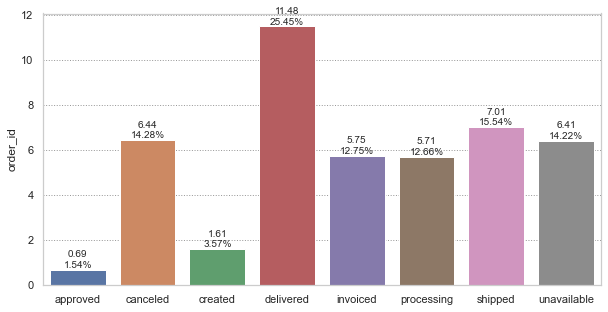

In [14]:
status = orders.groupby('order_status').count()['order_id']
status = np.log(status)

fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x=status.index.tolist(), y=status)
for i in ax.containers:
    ax.bar_label(i, labels=[str(round(i.datavalues[j],2))+'\n'+str(round(i.datavalues[j]/(sum(i.datavalues))*100, 2))+'%' for j in range(len(i))])
plt.show()

In [15]:
# Garder uniquement les commandes livrées
orders = orders[orders['order_status']=='delivered']

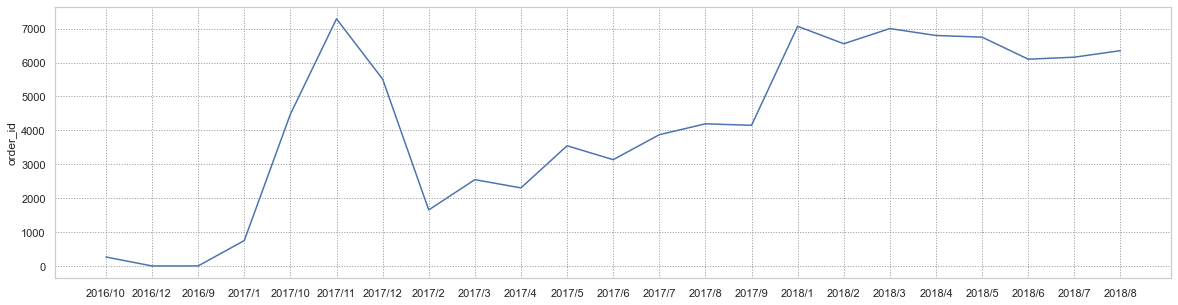

In [16]:
# Fréquence d'achats dans le temps
orders = orders[['customer_id', 'order_id', 'order_purchase_timestamp']]

orders['time'] = orders['order_purchase_timestamp'].apply(lambda x: str(x.year)+'/'+str(x.month))
orders_time = orders.groupby('time').count()['order_id']
orders = orders.drop(columns='time')

fig, ax = plt.subplots(figsize=(20, 5))
sns.lineplot(x=orders_time.index.tolist(), y=orders_time)
plt.show()

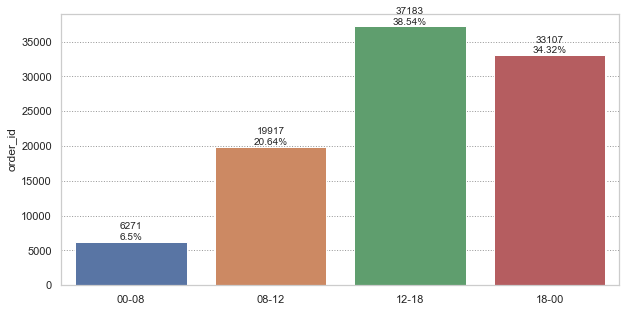

In [17]:
# Fréquence d'achats par moments du jour
orders['daytime'] = orders['order_purchase_timestamp'].dt.hour
orders['daytime'] = orders['daytime'].apply(lambda x : 0 if x>=0 and x <8 else 1 if x<12 else 2 if x<18 else 4)
orders_daytime = orders.groupby('daytime').count()['order_id']

fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x=['00-08', '08-12', '12-18', '18-00'], y=orders_daytime)
for i in ax.containers:
    ax.bar_label(i, labels=[str(int(i.datavalues[j]))+'\n'+str(round(i.datavalues[j]/(sum(i.datavalues))*100, 2))+'%' for j in range(len(i))])
plt.show()

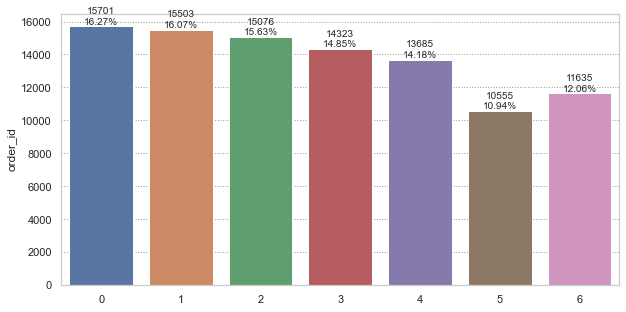

In [18]:
# Fréquence d'achats par jour de semaine
orders['weekday'] = orders['order_purchase_timestamp'].dt.weekday
orders_weekday= orders.groupby('weekday').count()['order_id']

fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x=orders_weekday.index.tolist(), y=orders_weekday)
for i in ax.containers:
    ax.bar_label(i, labels=[str(int(i.datavalues[j]))+'\n'+str(round(i.datavalues[j]/(sum(i.datavalues))*100, 2))+'%' for j in range(len(i))])
plt.show()

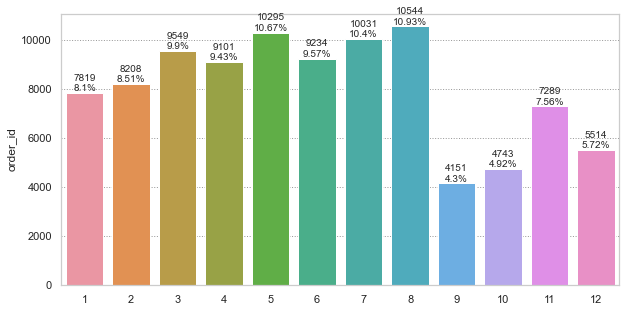

In [19]:
# Fréquence d'achats par mois de l'année
orders['month'] = orders['order_purchase_timestamp'].dt.month
orders_month= orders.groupby('month').count()['order_id']

fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x=orders_month.index.tolist(), y=orders_month)
for i in ax.containers:
    ax.bar_label(i, labels=[str(int(i.datavalues[j]))+'\n'+str(round(i.datavalues[j]/(sum(i.datavalues))*100, 2))+'%' for j in range(len(i))])
plt.show()

p-value is:  4.233030316360296e-160
chi=808.810731, critical value=28.869299
At 0.05 level of significance, we reject the null hypotheses and accept H1. 
    They are not independent.


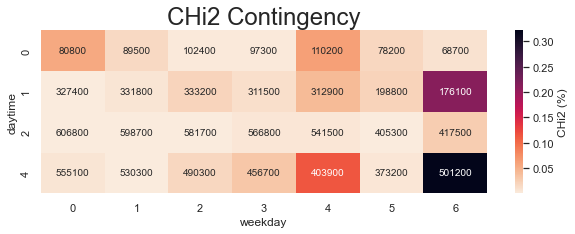

In [20]:
chi2(orders, 'daytime', 'weekday', heigth=3, width=10)

## df = Customers x Orders

In [21]:
df = pd.merge(customers[['customer_unique_id', 'customer_id', 'customer_state']], orders, how='inner', on=['customer_id']).drop(columns='customer_id')
print('Doublons :', len(doublons(df['order_id'])))
df

Doublons : 0


customer_unique_id customer_state  \
0      861eff4711a542e4b93843c6dd7febb0             SP   
1      290c77bc529b7ac935b93aa66c333dc3             SP   
2      060e732b5b29e8181a18229c7b0b2b5e             SP   
3      259dac757896d24d7702b9acbbff3f3c             SP   
4      345ecd01c38d18a9036ed96c73b8d066             SP   
...                                 ...            ...   
96473  1a29b476fee25c95fbafc67c5ac95cf8             SP   
96474  d52a67c98be1cf6a5c84435bd38d095d             SP   
96475  e9f50caf99f032f0bf3c55141f019d99             CE   
96476  73c2643a0a458b49f58cea58833b192e             RS   
96477  84732c5050c01db9b23e19ba39899398             SP   

                               order_id order_purchase_timestamp  daytime  \
0      00e7ee1b050b8499577073aeb2a297a1      2017-05-16 15:05:35        2   
1      29150127e6685892b6eab3eec79f59c7      2018-01-12 20:48:24        4   
2      b2059ed67ce144a36e2aa97d2c9e9ad2      2018-05-19 16:07:45        2   
3      951670f92359f4fe4a63112aa7306eba      2018-03-13 16:06:38        2   
4      6b7d50bd145f6fc7f33cebabd7e49d0f      2018-07-29 09:51:30        1   
...                                 ...                      ...      ...   
96473  6760e20addcf0121e9d58f2f1ff14298      2018-04-07 15:48:17        2   
96474  9ec0c8947d973db4f4e8dcf1fbfa8f1b      2018-04-04 08:20:22        1   
96475  fed4434add09a6f332ea398efd656a5c      2018-04-08 20:11:50        4   
96476  e31ec91cea1ecf97797787471f98a8c2      2017-11-03 21:08:33        4   
96477  28db69209a75e59f20ccbb5c36a20b90      2017-12-19 14:27:23        2   

       weekday  month  
0            1      5  
1            4      1  
2            5      5  
3            1      3  
4            6      7  
...        ...    ...  
96473        5      4  
96474        2      4  
96475        6      4  
96476        4     11  
96477        1     12  

[96478 rows x 7 columns]

In [22]:
nb_orders = df.groupby(['customer_unique_id']).count().reset_index(level=0).sort_values(by='order_id', ascending=False)
nb_orders

customer_unique_id  customer_state  order_id  \
51431  8d50f5eadf50201ccdcedfb9e2ac8455              15        15   
22779  3e43e6105506432c953e165fb2acf44c               9         9   
36706  6469f99c1f9dfae7733b25662e7f1782               7         7   
73921  ca77025e7201e3b30c44b472ff346268               7         7   
10060  1b6c7548a2a1f9037c1fd3ddfed95f33               7         7   
...                                 ...             ...       ...   
31564  565811ed44e539a14bc391cf57373ed1               1         1   
31563  5657f9f721c16800a66c21081d46b18d               1         1   
31562  5657dfebff5868c4dc7e8355fea865c4               1         1   
31561  5657596addb4d7b07b32cd330614bdf8               1         1   
93357  ffffd2657e2aad2907e67c3e9daecbeb               1         1   

       order_purchase_timestamp  daytime  weekday  month  
51431                        15       15       15     15  
22779                         9        9        9      9  
36706                         7        7        7      7  
73921                         7        7        7      7  
10060                         7        7        7      7  
...                         ...      ...      ...    ...  
31564                         1        1        1      1  
31563                         1        1        1      1  
31562                         1        1        1      1  
31561                         1        1        1      1  
93357                         1        1        1      1  

[93358 rows x 7 columns]

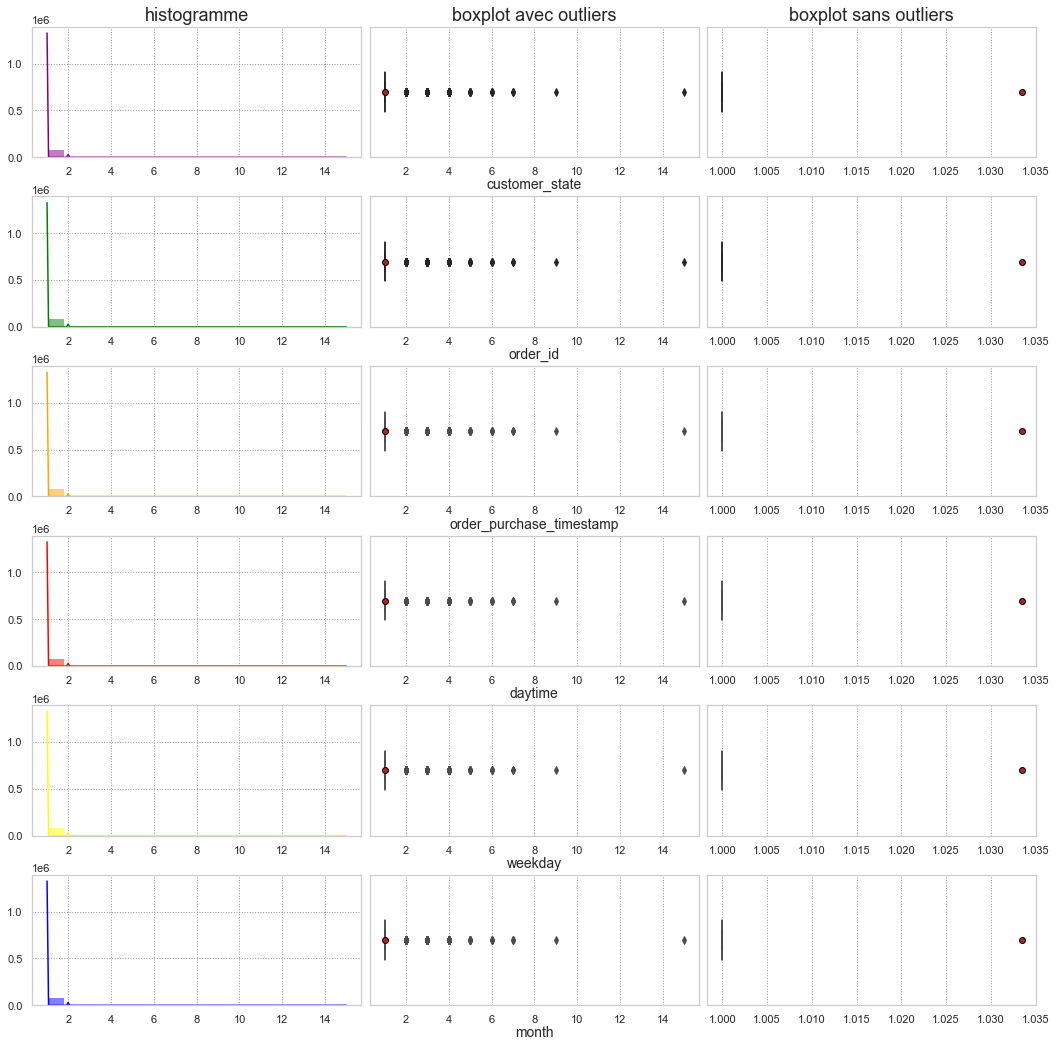

In [23]:
histo_distribution(nb_orders)

## Orders Items

In [24]:
order_items = pd.read_csv('olist_order_items_dataset.csv', low_memory=low_memory)
order_items

order_id  order_item_id  \
0       00010242fe8c5a6d1ba2dd792cb16214              1   
1       00018f77f2f0320c557190d7a144bdd3              1   
2       000229ec398224ef6ca0657da4fc703e              1   
3       00024acbcdf0a6daa1e931b038114c75              1   
4       00042b26cf59d7ce69dfabb4e55b4fd9              1   
...                                  ...            ...   
112645  fffc94f6ce00a00581880bf54a75a037              1   
112646  fffcd46ef2263f404302a634eb57f7eb              1   
112647  fffce4705a9662cd70adb13d4a31832d              1   
112648  fffe18544ffabc95dfada21779c9644f              1   
112649  fffe41c64501cc87c801fd61db3f6244              1   

                              product_id                         seller_id  \
0       4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1       e5f2d52b802189ee658865ca93d83a8f  dd7ddc04e1b6c2c614352b383efe2d36   
2       c777355d18b72b67abbeef9df44fd0fd  5b51032eddd242adc84c38acab88f23d   
3       7634da152a4610f1595efa32f14722fc  9d7a1d34a5052409006425275ba1c2b4   
4       ac6c3623068f30de03045865e4e10089  df560393f3a51e74553ab94004ba5c87   
...                                  ...                               ...   
112645  4aa6014eceb682077f9dc4bffebc05b0  b8bc237ba3788b23da09c0f1f3a3288c   
112646  32e07fd915822b0765e448c4dd74c828  f3c38ab652836d21de61fb8314b69182   
112647  72a30483855e2eafc67aee5dc2560482  c3cfdc648177fdbbbb35635a37472c53   
112648  9c422a519119dcad7575db5af1ba540e  2b3e4a2a3ea8e01938cabda2a3e5cc79   
112649  350688d9dc1e75ff97be326363655e01  f7ccf836d21b2fb1de37564105216cc1   

        shipping_limit_date   price  freight_value  
0       2017-09-19 09:45:35   58.90          13.29  
1       2017-05-03 11:05:13  239.90          19.93  
2       2018-01-18 14:48:30  199.00          17.87  
3       2018-08-15 10:10:18   12.99          12.79  
4       2017-02-13 13:57:51  199.90          18.14  
...                     ...     ...            ...  
112645  2018-05-02 04:11:01  299.99          43.41  
112646  2018-07-20 04:31:48  350.00          36.53  
112647  2017-10-30 17:14:25   99.90          16.95  
112648  2017-08-21 00:04:32   55.99           8.72  
112649  2018-06-12 17:10:13   43.00          12.79  

[112650 rows x 7 columns]

In [25]:
# Volime des commandes
orders_volume = order_items[['order_id', 'product_id', 'order_item_id']].groupby(['order_id', 'product_id']).max().reset_index(level=0)
orders_volume = orders_volume[['order_id', 'order_item_id']].groupby(['order_id']).sum().reset_index(level=0)
orders_volume = renameCol(orders_volume, 'order_item_id', 'orders_volume')
orders_volume.sort_values(by='orders_volume', ascending=False)

order_id  orders_volume
50137  8272b63d03f5f79c56e9e4120aec44ef             52
77909  ca3625898fbd48669d50701aba51cd5f             43
34716  5a3b1c29a49756e75f1ef513383c0c12             41
38273  637617b3ffe9e2f7a2411243829226d0             31
66653  ad850e69fce9a512ada84086651a2e7d             28
...                                 ...            ...
34640  5a0911d70c1f85d3bed0df1bf693a6dd              1
34639  5a082b558a3798d3e36d93bfa8ca1eae              1
34637  5a07264682e0b8fbb3f166edbbffc6e8              1
34636  5a071192a28951b76774e5a760c8c9b7              1
98665  fffe41c64501cc87c801fd61db3f6244              1

[98666 rows x 2 columns]

In [26]:
products = pd.read_csv('olist_products_dataset.csv', low_memory=low_memory)
products

product_id              product_category_name  \
0      1e9e8ef04dbcff4541ed26657ea517e5                         perfumaria   
1      3aa071139cb16b67ca9e5dea641aaa2f                              artes   
2      96bd76ec8810374ed1b65e291975717f                      esporte_lazer   
3      cef67bcfe19066a932b7673e239eb23d                              bebes   
4      9dc1a7de274444849c219cff195d0b71              utilidades_domesticas   
...                                 ...                                ...   
32946  a0b7d5a992ccda646f2d34e418fff5a0                   moveis_decoracao   
32947  bf4538d88321d0fd4412a93c974510e6  construcao_ferramentas_iluminacao   
32948  9a7c6041fa9592d9d9ef6cfe62a71f8c                    cama_mesa_banho   
32949  83808703fc0706a22e264b9d75f04a2e             informatica_acessorios   
32950  106392145fca363410d287a815be6de4                    cama_mesa_banho   

       product_name_lenght  product_description_lenght  product_photos_qty  \
0                     40.0                       287.0                 1.0   
1                     44.0                       276.0                 1.0   
2                     46.0                       250.0                 1.0   
3                     27.0                       261.0                 1.0   
4                     37.0                       402.0                 4.0   
...                    ...                         ...                 ...   
32946                 45.0                        67.0                 2.0   
32947                 41.0                       971.0                 1.0   
32948                 50.0                       799.0                 1.0   
32949                 60.0                       156.0                 2.0   
32950                 58.0                       309.0                 1.0   

       product_weight_g  product_length_cm  product_height_cm  \
0                 225.0               16.0               10.0   
1                1000.0               30.0               18.0   
2                 154.0               18.0                9.0   
3                 371.0               26.0                4.0   
4                 625.0               20.0               17.0   
...                 ...                ...                ...   
32946           12300.0               40.0               40.0   
32947            1700.0               16.0               19.0   
32948            1400.0               27.0                7.0   
32949             700.0               31.0               13.0   
32950            2083.0               12.0                2.0   

       product_width_cm  
0                  14.0  
1                  20.0  
2                  15.0  
3                  26.0  
4                  13.0  
...                 ...  
32946              40.0  
32947              16.0  
32948              27.0  
32949              20.0  
32950               7.0  

[32951 rows x 9 columns]

In [27]:
nan_cols(products)

Column  #NaN  %NaN  #Not_NaN  %Not_NaN
0                  product_id     0  0.00     32951    100.00
1       product_category_name   610  1.85     32341     98.15
2         product_name_lenght   610  1.85     32341     98.15
3  product_description_lenght   610  1.85     32341     98.15
4          product_photos_qty   610  1.85     32341     98.15
5            product_weight_g     2  0.01     32949     99.99
6           product_length_cm     2  0.01     32949     99.99
7           product_height_cm     2  0.01     32949     99.99
8            product_width_cm     2  0.01     32949     99.99

In [28]:
products = products[products['product_category_name'].notna()]

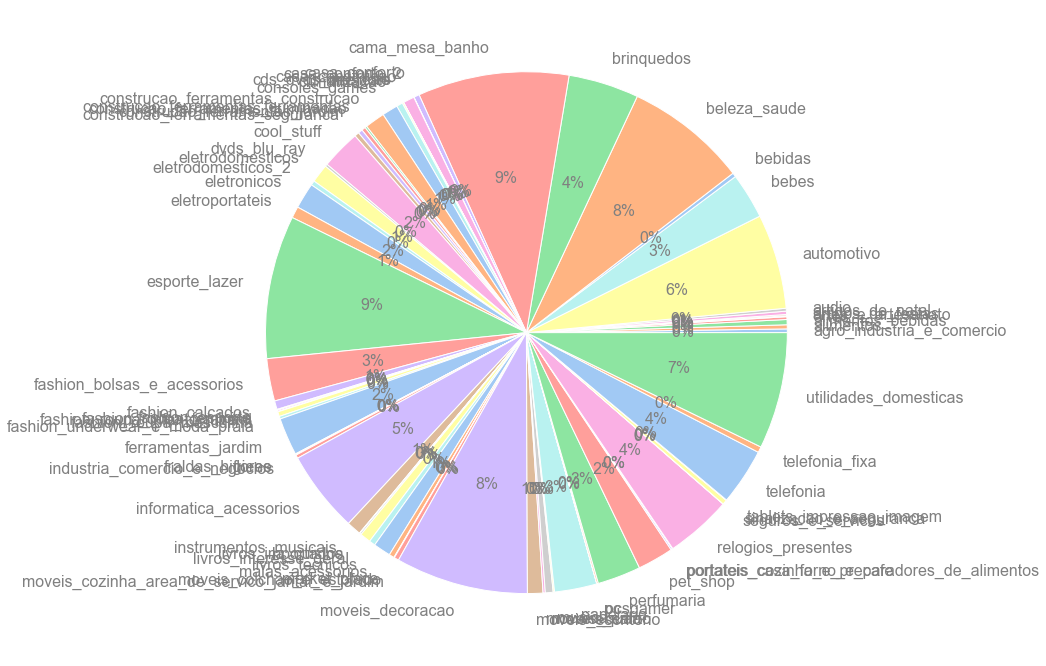

In [29]:
# Le nombre de produits par catégorie
products_categ= products.groupby('product_category_name').count()['product_id']

colors = sns.color_palette('pastel')
fig, ax = plt.subplots(figsize=(12, 12))
plt.pie(products_categ, labels=products_categ.index.tolist(), colors = colors, autopct = '%0.0f%%', textprops = {'color': 'Gray','fontsize':16})
plt.show()

In [30]:
order_items = pd.merge(order_items, products[['product_id', 'product_category_name']], how='inner', on=['product_id'])
order_items

order_id  order_item_id  \
0       00010242fe8c5a6d1ba2dd792cb16214              1   
1       130898c0987d1801452a8ed92a670612              1   
2       532ed5e14e24ae1f0d735b91524b98b9              1   
3       6f8c31653edb8c83e1a739408b5ff750              1   
4       7d19f4ef4d04461989632411b7e588b9              1   
...                                  ...            ...   
111042  ffebd80e3291e811c308365936897efd              1   
111043  ffee31fb4b5e35c9123608015637c495              1   
111044  fff7c4452f050315db1b3f24d9df5fcd              1   
111045  fffa82886406ccf10c7b4e35c4ff2788              1   
111046  fffe41c64501cc87c801fd61db3f6244              1   

                              product_id                         seller_id  \
0       4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
1       4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
2       4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
3       4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
4       4244733e06e7ecb4970a6e2683c13e61  48436dade18ac8b2bce089ec2a041202   
...                                  ...                               ...   
111042  4cc4d02efc8f249c13355147fb44e34d  d1c7fa84e48cfa21a0e595167c1c500e   
111043  b10ecf8e33aaaea419a9fa860ea80fb5  0241d4d5d36f10f80c644447315af0bd   
111044  dd469c03ad67e201bc2179ef077dcd48  7e93a43ef30c4f03f38b393420bc753a   
111045  bbe7651fef80287a816ead73f065fc4b  8f2ce03f928b567e3d56181ae20ae952   
111046  350688d9dc1e75ff97be326363655e01  f7ccf836d21b2fb1de37564105216cc1   

        shipping_limit_date  price  freight_value product_category_name  
0       2017-09-19 09:45:35   58.9          13.29            cool_stuff  
1       2017-07-05 02:44:11   55.9          17.96            cool_stuff  
2       2018-05-23 10:56:25   64.9          18.33            cool_stuff  
3       2017-08-07 18:55:08   58.9          16.17            cool_stuff  
4       2017-08-16 22:05:11   58.9          13.29            cool_stuff  
...                     ...    ...            ...                   ...  
111042  2018-07-18 20:23:55  129.9          51.20    ferramentas_jardim  
111043  2018-08-21 10:10:11   99.0          13.52      moveis_decoracao  
111044  2017-06-07 17:05:23  736.0          20.91    relogios_presentes  
111045  2017-12-22 17:31:42  229.9          44.02         esporte_lazer  
111046  2018-06-12 17:10:13   43.0          12.79       cama_mesa_banho  

[111047 rows x 8 columns]

In [31]:
order_items[order_items['order_id'].isin(order_items[order_items['order_item_id']>1]['order_id'])].sort_values(by=['order_id', 'order_item_id']).tail(20)

order_id  order_item_id  \
75966   ffc16cecff8dc037f60458f28d1c1ba5              1   
58543   ffc16cecff8dc037f60458f28d1c1ba5              2   
66857   ffd543c2b60842e148a86870dc60e212              1   
8068    ffd543c2b60842e148a86870dc60e212              2   
111031  ffd6f465cab015b452d398ac1f5d978a              1   
111032  ffd6f465cab015b452d398ac1f5d978a              2   
111033  ffd6f465cab015b452d398ac1f5d978a              3   
45093   ffd84ab39cd5e873d8dba24342e65c01              1   
45094   ffd84ab39cd5e873d8dba24342e65c01              2   
111038  ffe4b41e99d39f0b837a239110260530              1   
111039  ffe4b41e99d39f0b837a239110260530              2   
1394    ffecd5a79a0084f6a592288c67e3c298              1   
1395    ffecd5a79a0084f6a592288c67e3c298              2   
1396    ffecd5a79a0084f6a592288c67e3c298              3   
21653   fff8287bbae429a99bb7e8c21d151c41              1   
21654   fff8287bbae429a99bb7e8c21d151c41              2   
22958   fffb9224b6fc7c43ebb0904318b10b5f              1   
22959   fffb9224b6fc7c43ebb0904318b10b5f              2   
22960   fffb9224b6fc7c43ebb0904318b10b5f              3   
22961   fffb9224b6fc7c43ebb0904318b10b5f              4   

                              product_id                         seller_id  \
75966   241e398aacc909372622952b2ec6f954  de23c3b98a88888289c6f5cc1209054a   
58543   7c1043bb5837db0c6bc1953419a18628  de23c3b98a88888289c6f5cc1209054a   
66857   3ce943997ff85cad84ec6770b35d6bcd  9c0e69c7bf2619675bbadf47b43f655a   
8068    b7d94dc0640c7025dc8e3b46b52d8239  9c0e69c7bf2619675bbadf47b43f655a   
111031  fdcf45aa23bb8312ecc0027d6e1ef1c4  113e3a788b935f48aad63e1c41dac1bd   
111032  fdcf45aa23bb8312ecc0027d6e1ef1c4  113e3a788b935f48aad63e1c41dac1bd   
111033  fdcf45aa23bb8312ecc0027d6e1ef1c4  113e3a788b935f48aad63e1c41dac1bd   
45093   fcf50ee5ad1f1a48671052487d2b0bff  0be8ff43f22e456b4e0371b2245e4d01   
45094   fcf50ee5ad1f1a48671052487d2b0bff  0be8ff43f22e456b4e0371b2245e4d01   
111038  e97df839917a6e93404867b1d0319bfc  42bde9fef835393bb8a8849cb6b7f245   
111039  e97df839917a6e93404867b1d0319bfc  42bde9fef835393bb8a8849cb6b7f245   
1394    50fd2b788dc166edd20512370dac54df  8b321bb669392f5163d04c59e235e066   
1395    50fd2b788dc166edd20512370dac54df  8b321bb669392f5163d04c59e235e066   
1396    50fd2b788dc166edd20512370dac54df  8b321bb669392f5163d04c59e235e066   
21653   bee2e070c39f3dd2f6883a17a5f0da45  4e922959ae960d389249c378d1c939f5   
21654   bee2e070c39f3dd2f6883a17a5f0da45  4e922959ae960d389249c378d1c939f5   
22958   43423cdffde7fda63d0414ed38c11a73  b1fc4f64df5a0e8b6913ab38803c57a9   
22959   43423cdffde7fda63d0414ed38c11a73  b1fc4f64df5a0e8b6913ab38803c57a9   
22960   43423cdffde7fda63d0414ed38c11a73  b1fc4f64df5a0e8b6913ab38803c57a9   
22961   43423cdffde7fda63d0414ed38c11a73  b1fc4f64df5a0e8b6913ab38803c57a9   

        shipping_limit_date   price  freight_value   product_category_name  
75966   2017-11-27 19:34:24  179.90          10.03               papelaria  
58543   2017-11-27 19:34:24  169.90          10.04               papelaria  
66857   2018-01-11 02:35:33  175.90           7.15  informatica_acessorios  
8068    2018-01-11 02:35:33  175.91          14.15  informatica_acessorios  
111031  2018-05-03 09:30:37    7.84          22.06        artigos_de_natal  
111032  2018-05-03 09:30:37    7.84          22.06        artigos_de_natal  
111033  2018-05-03 09:30:37    7.84          22.06        artigos_de_natal  
45093   2017-10-11 19:49:17   24.90           7.78  informatica_acessorios  
45094   2017-10-11 19:49:17   24.90           7.78  informatica_acessorios  
111038  2017-09-07 21:25:40   19.00          15.79              brinquedos  
111039  2017-09-07 21:25:40   19.00          15.79              brinquedos  
1394    2018-03-05 20:15:27   21.90          15.79             eletronicos  
1395    2018-03-05 20:15:27   21.90          15.79             eletronicos  
1396    2018-03-05 20:15:27   21.90          15.79             eletronicos 

Sum the prices

In [32]:
order_prices = order_items[['order_id','price', 'freight_value']].groupby('order_id').sum().reset_index(level=0)
order_prices = pd.merge(order_prices, order_items.loc[order_items['order_item_id']==1,['order_id', 'product_category_name']], how='inner', on=['order_id'])
order_prices.sort_values(by='price', ascending=False)

order_id     price  freight_value  \
1432   03caa2c082116e1d31e67e9ae3700499  13440.00         224.08   
43827  736e1922ae60d0d6a89247b851902527   7160.00         114.88   
3087   0812eb902a67711a1cb742b3cdaa65ae   6735.00         194.31   
96887  fefacc66af859508bf1a7934eab1e97f   6729.00         193.21   
93081  f5136e38d1a14a4dbd87dff67da82701   6499.00         227.66   
...                                 ...       ...            ...   
21475  38bcb524e1c38c2c1b60600a80fc8999      2.90           8.72   
88475  e8bbc1d69fee39eee4c72cb5c969e39d      2.29           7.78   
91871  f1d5c2e6867fa93ceee9ef9b34a53cbf      2.20           7.39   
41956  6e864b3f0ec71031117ad4cf46b7f2a1      0.85          18.23   
23816  3ee6513ae7ea23bdfab5b9ab60bffcb5      0.85          18.23   

                   product_category_name  
1432                      telefonia_fixa  
43827                     telefonia_fixa  
3087               utilidades_domesticas  
96887                                pcs  
93081                              artes  
...                                  ...  
21475                           pet_shop  
88475                          papelaria  
91871                       beleza_saude  
41956  construcao_ferramentas_construcao  
23816  construcao_ferramentas_construcao  

[97250 rows x 4 columns]

In [33]:
order_items[order_items['order_id']=='f5136e38d1a14a4dbd87dff67da82701']

order_id  order_item_id  \
110150  f5136e38d1a14a4dbd87dff67da82701              1   

                              product_id                         seller_id  \
110150  1bdf5e6731585cf01aa8169c7028d6ad  ee27a8f15b1dded4d213a468ba4eb391   

        shipping_limit_date   price  freight_value product_category_name  
110150  2017-06-15 02:45:17  6499.0         227.66                 artes

## df = Customers x Orders x Orders Prices x Orders Volumes

In [34]:
df = pd.merge(df, order_prices, how='inner', on=['order_id'])
df = pd.merge(df, orders_volume, how='inner', on=['order_id'])
print('Doublons :', len(doublons(df['order_id'])))
df

Doublons : 0


customer_unique_id customer_state  \
0      861eff4711a542e4b93843c6dd7febb0             SP   
1      290c77bc529b7ac935b93aa66c333dc3             SP   
2      060e732b5b29e8181a18229c7b0b2b5e             SP   
3      259dac757896d24d7702b9acbbff3f3c             SP   
4      345ecd01c38d18a9036ed96c73b8d066             SP   
...                                 ...            ...   
95114  1a29b476fee25c95fbafc67c5ac95cf8             SP   
95115  d52a67c98be1cf6a5c84435bd38d095d             SP   
95116  e9f50caf99f032f0bf3c55141f019d99             CE   
95117  73c2643a0a458b49f58cea58833b192e             RS   
95118  84732c5050c01db9b23e19ba39899398             SP   

                               order_id order_purchase_timestamp  daytime  \
0      00e7ee1b050b8499577073aeb2a297a1      2017-05-16 15:05:35        2   
1      29150127e6685892b6eab3eec79f59c7      2018-01-12 20:48:24        4   
2      b2059ed67ce144a36e2aa97d2c9e9ad2      2018-05-19 16:07:45        2   
3      951670f92359f4fe4a63112aa7306eba      2018-03-13 16:06:38        2   
4      6b7d50bd145f6fc7f33cebabd7e49d0f      2018-07-29 09:51:30        1   
...                                 ...                      ...      ...   
95114  6760e20addcf0121e9d58f2f1ff14298      2018-04-07 15:48:17        2   
95115  9ec0c8947d973db4f4e8dcf1fbfa8f1b      2018-04-04 08:20:22        1   
95116  fed4434add09a6f332ea398efd656a5c      2018-04-08 20:11:50        4   
95117  e31ec91cea1ecf97797787471f98a8c2      2017-11-03 21:08:33        4   
95118  28db69209a75e59f20ccbb5c36a20b90      2017-12-19 14:27:23        2   

       weekday  month   price  freight_value   product_category_name  \
0            1      5  124.99          21.88       moveis_escritorio   
1            4      1  289.00          46.48   utilidades_domesticas   
2            5      5  139.94          17.79       moveis_escritorio   
3            1      3  149.94          23.36       moveis_escritorio   
4            6      7  230.00          22.25           casa_conforto   
...        ...    ...     ...            ...                     ...   
95114        5      4   74.90          13.88  livros_interesse_geral   
95115        2      4  114.90          14.16           esporte_lazer   
95116        6      4   37.00          19.04            beleza_saude   
95117        4     11  689.00          22.07      relogios_presentes   
95118        1     12   13.99           7.78              perfumaria   

       orders_volume  
0                  1  
1                  1  
2                  1  
3                  1  
4                  1  
...              ...  
95114              1  
95115              1  
95116              1  
95117              1  
95118              1  

[95119 rows x 11 columns]

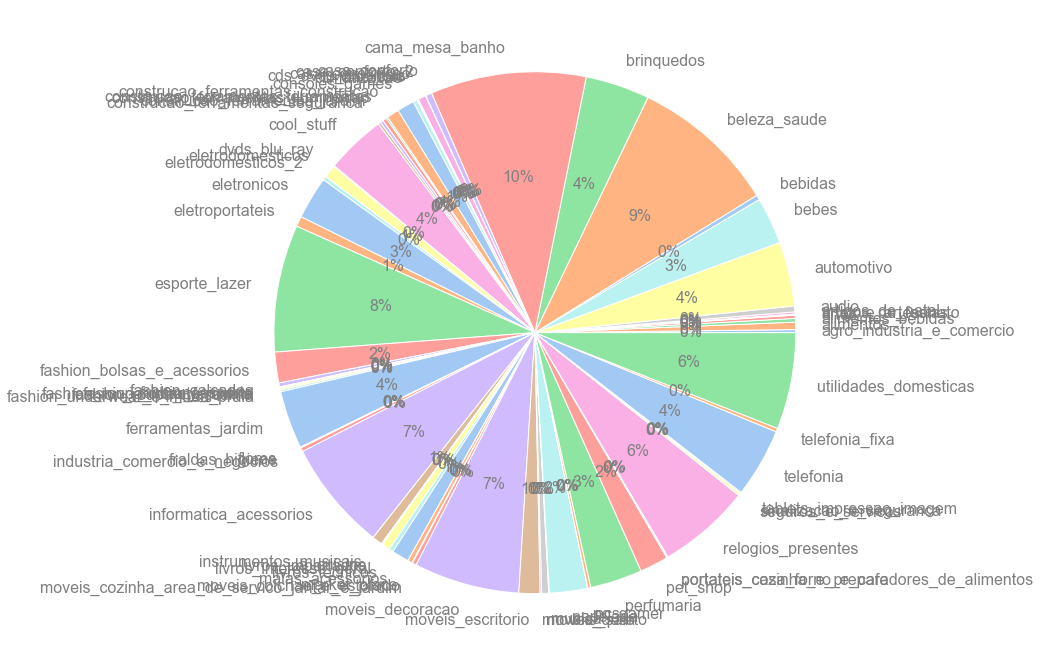

In [35]:
# Le nombre de commandes par catégorie
orders_categ= df.groupby('product_category_name').count()['customer_unique_id']

colors = sns.color_palette('pastel')
fig, ax = plt.subplots(figsize=(12, 12))
plt.pie(orders_categ, labels=orders_categ.index.tolist(), colors = colors, autopct = '%0.0f%%', textprops = {'color': 'Gray','fontsize':16})
plt.show()

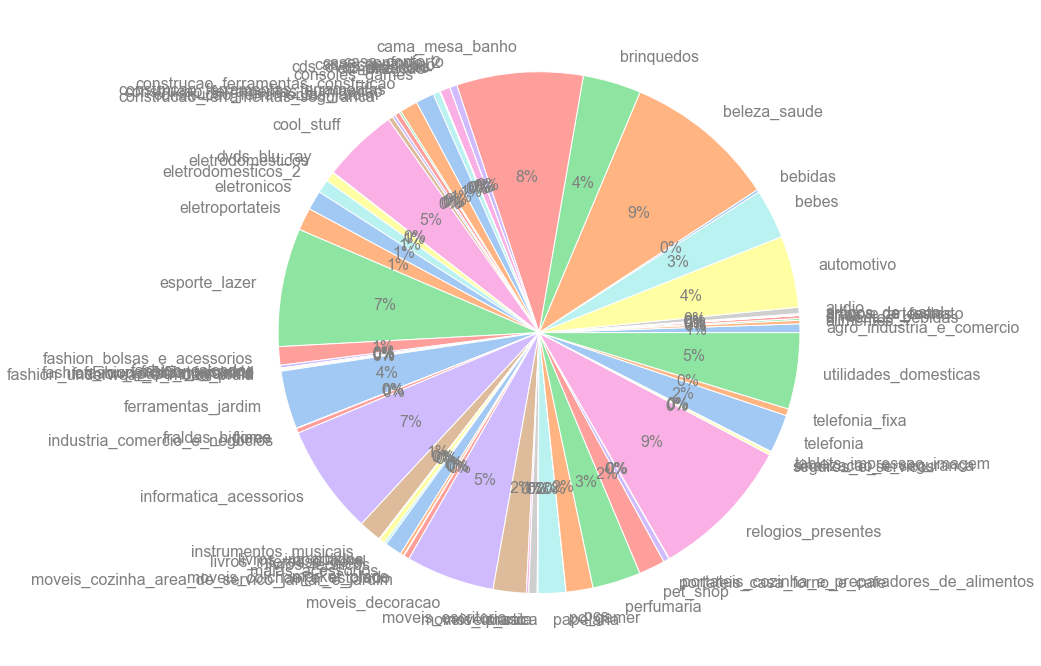

In [36]:
# Le montant total des commandes par catégorie
orders_categ= df.groupby('product_category_name').sum()['price']

colors = sns.color_palette('pastel')
fig, ax = plt.subplots(figsize=(12, 12))
plt.pie(orders_categ, labels=orders_categ.index.tolist(), colors = colors, autopct = '%0.0f%%', textprops = {'color': 'Gray','fontsize':16})
plt.show()

## Orders Payments

In [37]:
order_payments = pd.read_csv('olist_order_payments_dataset.csv', low_memory=low_memory)
order_payments#sort_values(by='payment_sequential', ascending=False)

order_id  payment_sequential payment_type  \
0       b81ef226f3fe1789b1e8b2acac839d17                   1  credit_card   
1       a9810da82917af2d9aefd1278f1dcfa0                   1  credit_card   
2       25e8ea4e93396b6fa0d3dd708e76c1bd                   1  credit_card   
3       ba78997921bbcdc1373bb41e913ab953                   1  credit_card   
4       42fdf880ba16b47b59251dd489d4441a                   1  credit_card   
...                                  ...                 ...          ...   
103881  0406037ad97740d563a178ecc7a2075c                   1       boleto   
103882  7b905861d7c825891d6347454ea7863f                   1  credit_card   
103883  32609bbb3dd69b3c066a6860554a77bf                   1  credit_card   
103884  b8b61059626efa996a60be9bb9320e10                   1  credit_card   
103885  28bbae6599b09d39ca406b747b6632b1                   1       boleto   

        payment_installments  payment_value  
0                          8          99.33  
1                          1          24.39  
2                          1          65.71  
3                          8         107.78  
4                          2         128.45  
...                      ...            ...  
103881                     1         363.31  
103882                     2          96.80  
103883                     1          47.77  
103884                     5         369.54  
103885                     1         191.58  

[103886 rows x 5 columns]

In [38]:
order_payments.groupby('order_id').sum().sort_values(by='payment_value', ascending=False)

payment_sequential  payment_installments  \
order_id                                                                     
03caa2c082116e1d31e67e9ae3700499                   1                     1   
736e1922ae60d0d6a89247b851902527                   1                     1   
0812eb902a67711a1cb742b3cdaa65ae                   1                     8   
fefacc66af859508bf1a7934eab1e97f                   1                     1   
f5136e38d1a14a4dbd87dff67da82701                   1                     1   
...                                              ...                   ...   
e8bbc1d69fee39eee4c72cb5c969e39d                   1                     1   
f1d5c2e6867fa93ceee9ef9b34a53cbf                   3                     2   
c8c528189310eaa44a745b8d9d26908b                   1                     1   
00b1cb0320190ca0daa2c88b35206009                   1                     1   
4637ca194b6387e2d538dc89b124b0ee                   1                     1   

                                  payment_value  
order_id                                         
03caa2c082116e1d31e67e9ae3700499       13664.08  
736e1922ae60d0d6a89247b851902527        7274.88  
0812eb902a67711a1cb742b3cdaa65ae        6929.31  
fefacc66af859508bf1a7934eab1e97f        6922.21  
f5136e38d1a14a4dbd87dff67da82701        6726.66  
...                                         ...  
e8bbc1d69fee39eee4c72cb5c969e39d          10.07  
f1d5c2e6867fa93ceee9ef9b34a53cbf           9.59  
c8c528189310eaa44a745b8d9d26908b           0.00  
00b1cb0320190ca0daa2c88b35206009           0.00  
4637ca194b6387e2d538dc89b124b0ee           0.00  

[99440 rows x 3 columns]

In [39]:
order_payments[order_payments['payment_sequential']>1].sort_values(by=['order_id', 'payment_sequential'], ascending=False).head(10)

order_id  payment_sequential payment_type  \
28537  ffc730a0615d28ec19f9cad02cb41442                   2  credit_card   
3009   ffa39020fe7c8a3e907320e1bec4b985                   2      voucher   
21648  ffa1dd97810de91a03abd7bd76d2fed1                   2      voucher   
11583  ff978de32e717acd3b5abe1fb069d2b6                   4      voucher   
28611  ff978de32e717acd3b5abe1fb069d2b6                   3      voucher   
26914  ff978de32e717acd3b5abe1fb069d2b6                   2      voucher   
96028  ff7400d904161b62b6e830b3988f5cbd                   2      voucher   
24664  ff20ee702706d9e407a34de9fe2ff768                   2      voucher   
95767  ff1f8f328e5a59ac754240b6dd31bcb4                   4      voucher   
75488  ff1f8f328e5a59ac754240b6dd31bcb4                   3      voucher   

       payment_installments  payment_value  
28537                     1          12.63  
3009                      1          64.01  
21648                     1         418.73  
11583                     1           7.68  
28611                     1           0.66  
26914                     1          10.80  
96028                     1         100.00  
24664                     1          50.00  
95767                     1          26.03  
75488                     1         142.58

In [40]:
order_payments[order_payments['order_id']=='ff978de32e717acd3b5abe1fb069d2b6']

order_id  payment_sequential payment_type  \
11583  ff978de32e717acd3b5abe1fb069d2b6                   4      voucher   
26914  ff978de32e717acd3b5abe1fb069d2b6                   2      voucher   
28611  ff978de32e717acd3b5abe1fb069d2b6                   3      voucher   
46828  ff978de32e717acd3b5abe1fb069d2b6                   1      voucher   

       payment_installments  payment_value  
11583                     1           7.68  
26914                     1          10.80  
28611                     1           0.66  
46828                     1          30.00

In [41]:
df[df['order_id']=='ff978de32e717acd3b5abe1fb069d2b6']

customer_unique_id customer_state  \
34063  7e1ca53dbea2514cb38bb0de60e8f16b             AM   

                               order_id order_purchase_timestamp  daytime  \
34063  ff978de32e717acd3b5abe1fb069d2b6      2017-12-12 09:50:42        1   

       weekday  month  price  freight_value   product_category_name  \
34063        1     12  27.99          21.15  informatica_acessorios   

       orders_volume  
34063              1

## Payments

In [42]:
payments = order_payments[['order_id', 'payment_sequential', 'payment_installments', 'payment_value']].groupby('order_id').agg({'payment_sequential':'max', 'payment_installments': 'max', 'payment_value': 'sum'}).reset_index(level=0)
payments.sort_values('payment_sequential', ascending=False)

order_id  payment_sequential  \
97261  fa65dad1b0e818e3ccc5cb0e39231352                  29   
79611  ccf804e764ed5650cd8759557269dc13                  26   
15577  285c2e15bebd4ac83635ccc563dc71f4                  22   
53168  895ab968e7bb0d5659d16cd74cd1650c                  21   
92724  ee9ca989fc93ba09a6eddc250ce01742                  19   
...                                 ...                 ...   
33713  56ca2955a23551796d37da2e384c7139                   1   
33712  56c9b97f31031c70ffb000219dc6f403                   1   
33711  56c93a3f93a1e7eb24ed51a6931dc488                   1   
33710  56c898abec8a6fd5e84ffc42904c4f65                   1   
99439  fffe41c64501cc87c801fd61db3f6244                   1   

       payment_installments  payment_value  
97261                     1         457.99  
79611                     1          62.68  
15577                     1          40.85  
53168                     1         161.32  
92724                     1          82.73  
...                     ...            ...  
33713                     1          30.10  
33712                     8         163.81  
33711                     1         933.70  
33710                    10         478.33  
99439                     1          55.79  

[99440 rows x 4 columns]

In [43]:
payments[payments['order_id']=='ff978de32e717acd3b5abe1fb069d2b6']

order_id  payment_sequential  \
99293  ff978de32e717acd3b5abe1fb069d2b6                   4   

       payment_installments  payment_value  
99293                     1          49.14

## Payements Type

In [44]:
payment_type = order_payments[['order_id','payment_type']].drop_duplicates(subset='order_id')
payment_type

order_id payment_type
0       b81ef226f3fe1789b1e8b2acac839d17  credit_card
1       a9810da82917af2d9aefd1278f1dcfa0  credit_card
2       25e8ea4e93396b6fa0d3dd708e76c1bd  credit_card
3       ba78997921bbcdc1373bb41e913ab953  credit_card
4       42fdf880ba16b47b59251dd489d4441a  credit_card
...                                  ...          ...
103881  0406037ad97740d563a178ecc7a2075c       boleto
103882  7b905861d7c825891d6347454ea7863f  credit_card
103883  32609bbb3dd69b3c066a6860554a77bf  credit_card
103884  b8b61059626efa996a60be9bb9320e10  credit_card
103885  28bbae6599b09d39ca406b747b6632b1       boleto

[99440 rows x 2 columns]

In [45]:
payment_type['payment_type'].unique()

array(['credit_card', 'boleto', 'voucher', 'debit_card', 'not_defined'],
      dtype=object)

In [46]:
payment_type[payment_type['payment_type']=='not_defined']

order_id payment_type
51280  4637ca194b6387e2d538dc89b124b0ee  not_defined
57411  00b1cb0320190ca0daa2c88b35206009  not_defined
94427  c8c528189310eaa44a745b8d9d26908b  not_defined

In [47]:
payment_type = payment_type[payment_type['payment_type']!='not_defined']

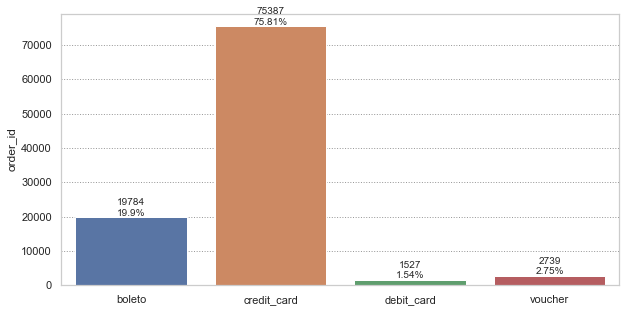

In [48]:
ptypes = payment_type.groupby('payment_type').count()['order_id']
ptypes_name = ptypes.index.tolist()

colors = sns.color_palette('pastel')
fig, ax = plt.subplots(figsize=(10, 5))
sns.barplot(x=ptypes_name, y=ptypes)
for i in ax.containers:
    ax.bar_label(i, labels=[str(int(i.datavalues[j]))+'\n'+str(round(i.datavalues[j]/(sum(i.datavalues))*100, 2))+'%' for j in range(len(i))])
plt.show()

## df = Customers x Orders x Orders Prices x Payements x Payements Type

In [49]:
df = pd.merge(df, payments, how='inner', on=['order_id'])
df = pd.merge(df, payment_type, how='inner', on=['order_id'])
df = df.drop(columns=['price', 'freight_value'])
print('Doublons :', len(doublons(df['order_id'])))
df

Doublons : 0


customer_unique_id customer_state  \
0      861eff4711a542e4b93843c6dd7febb0             SP   
1      290c77bc529b7ac935b93aa66c333dc3             SP   
2      060e732b5b29e8181a18229c7b0b2b5e             SP   
3      259dac757896d24d7702b9acbbff3f3c             SP   
4      345ecd01c38d18a9036ed96c73b8d066             SP   
...                                 ...            ...   
95113  1a29b476fee25c95fbafc67c5ac95cf8             SP   
95114  d52a67c98be1cf6a5c84435bd38d095d             SP   
95115  e9f50caf99f032f0bf3c55141f019d99             CE   
95116  73c2643a0a458b49f58cea58833b192e             RS   
95117  84732c5050c01db9b23e19ba39899398             SP   

                               order_id order_purchase_timestamp  daytime  \
0      00e7ee1b050b8499577073aeb2a297a1      2017-05-16 15:05:35        2   
1      29150127e6685892b6eab3eec79f59c7      2018-01-12 20:48:24        4   
2      b2059ed67ce144a36e2aa97d2c9e9ad2      2018-05-19 16:07:45        2   
3      951670f92359f4fe4a63112aa7306eba      2018-03-13 16:06:38        2   
4      6b7d50bd145f6fc7f33cebabd7e49d0f      2018-07-29 09:51:30        1   
...                                 ...                      ...      ...   
95113  6760e20addcf0121e9d58f2f1ff14298      2018-04-07 15:48:17        2   
95114  9ec0c8947d973db4f4e8dcf1fbfa8f1b      2018-04-04 08:20:22        1   
95115  fed4434add09a6f332ea398efd656a5c      2018-04-08 20:11:50        4   
95116  e31ec91cea1ecf97797787471f98a8c2      2017-11-03 21:08:33        4   
95117  28db69209a75e59f20ccbb5c36a20b90      2017-12-19 14:27:23        2   

       weekday  month   product_category_name  orders_volume  \
0            1      5       moveis_escritorio              1   
1            4      1   utilidades_domesticas              1   
2            5      5       moveis_escritorio              1   
3            1      3       moveis_escritorio              1   
4            6      7           casa_conforto              1   
...        ...    ...                     ...            ...   
95113        5      4  livros_interesse_geral              1   
95114        2      4           esporte_lazer              1   
95115        6      4            beleza_saude              1   
95116        4     11      relogios_presentes              1   
95117        1     12              perfumaria              1   

       payment_sequential  payment_installments  payment_value payment_type  
0                       1                     2         146.87  credit_card  
1                       1                     8         335.48  credit_card  
2                       1                     7         157.73  credit_card  
3                       1                     1         173.30  credit_card  
4                       1                     8         252.25  credit_card  
...                   ...                   ...            ...          ...  
95113                   1                     6          88.78  credit_card  
95114                   1                     3         129.06  credit_card  
95115                   1                     5          56.04  credit_card  
95116                   1                     2         711.07  credit_card  
95117                   1                     1          21.77  credit_card  

[95118 rows x 13 columns]

## Reviews

In [50]:
reviews = pd.read_csv('olist_order_reviews_dataset.csv', low_memory=low_memory)
print('Doublons :', len(doublons(reviews['order_id'])))
reviews = reviews[['order_id', 'review_score']].groupby('order_id').mean().reset_index(level=0)
print('Doublons :', len(doublons(reviews['order_id'])))
reviews

Doublons : 551
Doublons : 0


order_id  review_score
0      00010242fe8c5a6d1ba2dd792cb16214           5.0
1      00018f77f2f0320c557190d7a144bdd3           4.0
2      000229ec398224ef6ca0657da4fc703e           5.0
3      00024acbcdf0a6daa1e931b038114c75           4.0
4      00042b26cf59d7ce69dfabb4e55b4fd9           5.0
...                                 ...           ...
98668  fffc94f6ce00a00581880bf54a75a037           5.0
98669  fffcd46ef2263f404302a634eb57f7eb           5.0
98670  fffce4705a9662cd70adb13d4a31832d           5.0
98671  fffe18544ffabc95dfada21779c9644f           5.0
98672  fffe41c64501cc87c801fd61db3f6244           5.0

[98673 rows x 2 columns]

## df = Customers x Orders x Orders Prices x Payements x Payements Type x Reviews

In [51]:
df = pd.merge(df, reviews[['order_id', 'review_score']], how='inner', on=['order_id'])
print('Doublons :', len(doublons(df['order_id'])))
df

Doublons : 0


customer_unique_id customer_state  \
0      861eff4711a542e4b93843c6dd7febb0             SP   
1      290c77bc529b7ac935b93aa66c333dc3             SP   
2      060e732b5b29e8181a18229c7b0b2b5e             SP   
3      259dac757896d24d7702b9acbbff3f3c             SP   
4      345ecd01c38d18a9036ed96c73b8d066             SP   
...                                 ...            ...   
94476  1a29b476fee25c95fbafc67c5ac95cf8             SP   
94477  d52a67c98be1cf6a5c84435bd38d095d             SP   
94478  e9f50caf99f032f0bf3c55141f019d99             CE   
94479  73c2643a0a458b49f58cea58833b192e             RS   
94480  84732c5050c01db9b23e19ba39899398             SP   

                               order_id order_purchase_timestamp  daytime  \
0      00e7ee1b050b8499577073aeb2a297a1      2017-05-16 15:05:35        2   
1      29150127e6685892b6eab3eec79f59c7      2018-01-12 20:48:24        4   
2      b2059ed67ce144a36e2aa97d2c9e9ad2      2018-05-19 16:07:45        2   
3      951670f92359f4fe4a63112aa7306eba      2018-03-13 16:06:38        2   
4      6b7d50bd145f6fc7f33cebabd7e49d0f      2018-07-29 09:51:30        1   
...                                 ...                      ...      ...   
94476  6760e20addcf0121e9d58f2f1ff14298      2018-04-07 15:48:17        2   
94477  9ec0c8947d973db4f4e8dcf1fbfa8f1b      2018-04-04 08:20:22        1   
94478  fed4434add09a6f332ea398efd656a5c      2018-04-08 20:11:50        4   
94479  e31ec91cea1ecf97797787471f98a8c2      2017-11-03 21:08:33        4   
94480  28db69209a75e59f20ccbb5c36a20b90      2017-12-19 14:27:23        2   

       weekday  month   product_category_name  orders_volume  \
0            1      5       moveis_escritorio              1   
1            4      1   utilidades_domesticas              1   
2            5      5       moveis_escritorio              1   
3            1      3       moveis_escritorio              1   
4            6      7           casa_conforto              1   
...        ...    ...                     ...            ...   
94476        5      4  livros_interesse_geral              1   
94477        2      4           esporte_lazer              1   
94478        6      4            beleza_saude              1   
94479        4     11      relogios_presentes              1   
94480        1     12              perfumaria              1   

       payment_sequential  payment_installments  payment_value payment_type  \
0                       1                     2         146.87  credit_card   
1                       1                     8         335.48  credit_card   
2                       1                     7         157.73  credit_card   
3                       1                     1         173.30  credit_card   
4                       1                     8         252.25  credit_card   
...                   ...                   ...            ...          ...   
94476                   1                     6          88.78  credit_card   
94477                   1                     3         129.06  credit_card   
94478                   1                     5          56.04  credit_card   
94479                   1                     2         711.07  credit_card   
94480                   1                     1          21.77  credit_card   

       review_score  
0               4.0  
1               5.0  
2               5.0  
3               5.0  
4               5.0  
...             ...  
94476           4.0  
94477           5.0  
94478           1.0  
94479           5.0  
94480           5.0  

[94481 rows x 14 columns]

In [52]:
doublons(df['customer_unique_id'])

636      b6c083700ca8c135ba9f0f132930d4e8
2662     66980c3775537536f77b434d74e520f5
3447     5faabfe6772088c4d906b63fa81ac63d
3596     c2551ea089b7ebbc67a2ea8757152514
4735     67626c49069bdf05ff127d59a6649948
                       ...               
94367    8bab3162259edfaadd1ea2e1fe7f58dc
94370    12ab9334b1240d6d037f2b0102a49571
94378    0ee57f62666561b72f2ceacad0230cbf
94394    0ceb502fc33a2ad327b08288c5310e2e
94447    5cbfdb85ec130898108b32c50d619c39
Name: customer_unique_id, Length: 3005, dtype: object

In [53]:
df[df['customer_unique_id']=='012452d40dafae4df401bced74cdb490']

customer_unique_id customer_state  \
43024  012452d40dafae4df401bced74cdb490             SP   
51341  012452d40dafae4df401bced74cdb490             SP   

                               order_id order_purchase_timestamp  daytime  \
43024  e49d0607832db7c3b1343764225d8df6      2018-05-14 12:12:45        2   
51341  ce2b4f2836d78829e4796213d536101e      2017-06-18 22:46:42        4   

       weekday  month product_category_name  orders_volume  \
43024        0      5          beleza_saude              1   
51341        6      6     moveis_escritorio              1   

       payment_sequential  payment_installments  payment_value payment_type  \
43024                   2                    10         340.07      voucher   
51341                   1                     5         155.26  credit_card   

       review_score  
43024           5.0  
51341           4.0

In [54]:
df[df['customer_unique_id'].isin(doublons(df['customer_unique_id']))].sort_values(by='customer_unique_id').head(20)

customer_unique_id customer_state  \
19008  004288347e5e88a27ded2bb23747066c             RJ   
20944  004288347e5e88a27ded2bb23747066c             RJ   
83041  00a39521eb40f7012db50455bf083460             DF   
52143  00a39521eb40f7012db50455bf083460             DF   
629    00cc12a6d8b578b8ebd21ea4e2ae8b27             SP   
8489   00cc12a6d8b578b8ebd21ea4e2ae8b27             SP   
55645  011575986092c30523ecb71ff10cb473             MG   
3826   011575986092c30523ecb71ff10cb473             MG   
91668  011b4adcd54683b480c4d841250a987f             BA   
85636  011b4adcd54683b480c4d841250a987f             BA   
43024  012452d40dafae4df401bced74cdb490             SP   
51341  012452d40dafae4df401bced74cdb490             SP   
12277  012a218df8995d3ec3bb221828360c86             SP   
49904  012a218df8995d3ec3bb221828360c86             SP   
55394  013ef03e0f3f408dd9bf555e4edcdc0a             SP   
48711  013ef03e0f3f408dd9bf555e4edcdc0a             SP   
68181  013f4353d26bb05dc6652f1269458d8d             BA   
45036  013f4353d26bb05dc6652f1269458d8d             BA   
18698  015557c9912277312b9073947804a7ba             SP   
82279  015557c9912277312b9073947804a7ba             SP   

                               order_id order_purchase_timestamp  daytime  \
19008  a61d617fbe5bd006e40d3a0988fc844b      2017-07-27 14:13:03        2   
20944  08204559bebd39e09ee52dcb56d8faa2      2018-01-14 07:36:54        0   
83041  cea3e6c11eb60acb9d8d4d51694832f8      2018-06-03 10:12:57        1   
52143  7d32c87acba91ed87ebd98310fe1c54d      2018-05-23 20:14:21        4   
629    d61b915b69851aec8a8865f36cfd793e      2017-03-21 19:25:23        4   
8489   64307ceb91666760cf3ff463618302fd      2017-03-21 19:25:22        4   
55645  0f28d51fdd4828907bdc58b57f672e84      2018-02-17 15:54:49        2   
3826   ed0a6265b5b0a292cd537214f401f1fc      2018-04-18 21:58:08        4   
91668  f05a68aaa0d8f89e758c7134d53fa22a      2017-08-22 12:51:29        2   
85636  93b35affb86435b71ca01a6dd1eab2b1      2018-02-15 11:40:57        1   
43024  e49d0607832db7c3b1343764225d8df6      2018-05-14 12:12:45        2   
51341  ce2b4f2836d78829e4796213d536101e      2017-06-18 22:46:42        4   
12277  207258d556f9b9784b54de837ae49286      2018-06-18 13:08:38        2   
49904  e89e48d863049f7ca8a49758ae99f58a      2018-05-07 10:28:17        1   
55394  c94047ec162181b78322184f7a9aee43      2018-06-21 04:46:11        0   
48711  00cee8a4dbb042385cbbd84699e78b2e      2018-07-20 04:13:54        0   
68181  9eead354475b8b8fde3811f26b2599fc      2017-11-28 13:30:58        2   
45036  ddc5df3b1c497720bae1692c170baec0      2017-11-24 13:33:20        2   
18698  482c052df6392e43296eba90754938fc      2017-03-23 22:45:46        4   
82279  48d9d778ca005971949d2ccad7e99d70      2017-05-01 14:48:33        2   

       weekday  month  product_category_name  orders_volume  \
19008        3      7             cool_stuff              1   
20944        6      1       malas_acessorios              1   
83041        6      6            eletronicos              1   
52143        2      5          esporte_lazer              1   
629          1      3        cama_mesa_banho              1   
8489         1      3       eletrodomesticos              1   
55645        5      2             brinquedos              1   
3826         2      4  instrumentos_musicais              1   
91668        1      8          esporte_lazer              1   
85636        3      2              alimentos              2   
43024        0      5           beleza_saude              1   
51341        6      6      moveis_escritorio              1   
12277        0      6             automotivo              1   
49904        0      5             automotivo              1   
55394        3      6             brinquedos              1   
48711        4      7  instrumentos_musicais              1   
68181        1     11          esporte_lazer              2   
45036        4     11          esporte_lazer      

## Orders agregations (groupby Customers)

In [55]:
# Encodage des catégories avec renommage
dfe = OneHotEncoding(df, ['payment_type', 'product_category_name','customer_state'], ['ptype', 'pcategory','cstate'])
dfe

customer_unique_id                          order_id  \
0      861eff4711a542e4b93843c6dd7febb0  00e7ee1b050b8499577073aeb2a297a1   
1      290c77bc529b7ac935b93aa66c333dc3  29150127e6685892b6eab3eec79f59c7   
2      060e732b5b29e8181a18229c7b0b2b5e  b2059ed67ce144a36e2aa97d2c9e9ad2   
3      259dac757896d24d7702b9acbbff3f3c  951670f92359f4fe4a63112aa7306eba   
4      345ecd01c38d18a9036ed96c73b8d066  6b7d50bd145f6fc7f33cebabd7e49d0f   
...                                 ...                               ...   
94476  1a29b476fee25c95fbafc67c5ac95cf8  6760e20addcf0121e9d58f2f1ff14298   
94477  d52a67c98be1cf6a5c84435bd38d095d  9ec0c8947d973db4f4e8dcf1fbfa8f1b   
94478  e9f50caf99f032f0bf3c55141f019d99  fed4434add09a6f332ea398efd656a5c   
94479  73c2643a0a458b49f58cea58833b192e  e31ec91cea1ecf97797787471f98a8c2   
94480  84732c5050c01db9b23e19ba39899398  28db69209a75e59f20ccbb5c36a20b90   

      order_purchase_timestamp  daytime  weekday  month  orders_volume  \
0          2017-05-16 15:05:35        2        1      5              1   
1          2018-01-12 20:48:24        4        4      1              1   
2          2018-05-19 16:07:45        2        5      5              1   
3          2018-03-13 16:06:38        2        1      3              1   
4          2018-07-29 09:51:30        1        6      7              1   
...                        ...      ...      ...    ...            ...   
94476      2018-04-07 15:48:17        2        5      4              1   
94477      2018-04-04 08:20:22        1        2      4              1   
94478      2018-04-08 20:11:50        4        6      4              1   
94479      2017-11-03 21:08:33        4        4     11              1   
94480      2017-12-19 14:27:23        2        1     12              1   

       payment_sequential  payment_installments  payment_value  review_score  \
0                       1                     2         146.87           4.0   
1                       1                     8         335.48           5.0   
2                       1                     7         157.73           5.0   
3                       1                     1         173.30           5.0   
4                       1                     8         252.25           5.0   
...                   ...                   ...            ...           ...   
94476                   1                     6          88.78           4.0   
94477                   1                     3         129.06           5.0   
94478                   1                     5          56.04           1.0   
94479                   1                     2         711.07           5.0   
94480                   1                     1          21.77           5.0   

       ptype_boleto  ptype_credit_card  ptype_debit_card  ptype_voucher  \
0                 0                  1                 0              0   
1                 0                  1                 0              0   
2                 0                  1                 0              0   
3                 0                  1                 0              0   
4                 0                  1                 0              0   
...             ...                ...               ...            ...   
94476             0                  1                 0              0   
94477             0                  1                 0              0   
94478             0                  1                 0              0   
94479             0                  1                 0              0   
94480             0                  1                 0              0   

       pcategory_agro_industria_e_comercio  pcategory_alimentos  \
0                                        0                    0   
1                                        0                    0   
2                                        0                    0   
3                                        0                    0   
4         

In [56]:
# Sauvgarde des dates des commandes les plus récentes par client
orders_freshness = dfe.groupby('customer_unique_id').max().reset_index(level=0)[['customer_unique_id', 'order_purchase_timestamp']]
orders_freshness['order_purchase_timestamp'] = MinMax_Scaled(pd.DataFrame(orders_freshness['order_purchase_timestamp']))
orders_freshness

customer_unique_id  order_purchase_timestamp
0      0000366f3b9a7992bf8c76cfdf3221e2                  0.840025
1      0000b849f77a49e4a4ce2b2a4ca5be3f                  0.835723
2      0000f46a3911fa3c0805444483337064                  0.227613
3      0000f6ccb0745a6a4b88665a16c9f078                  0.538405
4      0004aac84e0df4da2b147fca70cf8255                  0.585848
...                                 ...                       ...
91471  fffcf5a5ff07b0908bd4e2dbc735a684                  0.357120
91472  fffea47cd6d3cc0a88bd621562a9d061                  0.623285
91473  ffff371b4d645b6ecea244b27531430a                  0.182688
91474  ffff5962728ec6157033ef9805bacc48                  0.828774
91475  ffffd2657e2aad2907e67c3e9daecbeb                  0.303834

[91476 rows x 2 columns]

In [57]:
# Agregation des infos clients par la somme
dfe = dfe.groupby('customer_unique_id').sum().reset_index(level=0)
dfe

customer_unique_id  daytime  weekday  month  \
0      0000366f3b9a7992bf8c76cfdf3221e2        1        3      5   
1      0000b849f77a49e4a4ce2b2a4ca5be3f        1        0      5   
2      0000f46a3911fa3c0805444483337064        4        4      3   
3      0000f6ccb0745a6a4b88665a16c9f078        4        3     10   
4      0004aac84e0df4da2b147fca70cf8255        4        1     11   
...                                 ...      ...      ...    ...   
91471  fffcf5a5ff07b0908bd4e2dbc735a684        4        3      6   
91472  fffea47cd6d3cc0a88bd621562a9d061        4        6     12   
91473  ffff371b4d645b6ecea244b27531430a        2        1      2   
91474  ffff5962728ec6157033ef9805bacc48        2        2      5   
91475  ffffd2657e2aad2907e67c3e9daecbeb        4        1      5   

       orders_volume  payment_sequential  payment_installments  payment_value  \
0                  1                   1                     8         141.90   
1                  1                   1                     1          27.19   
2                  1                   1                     8          86.22   
3                  1                   1                     4          43.62   
4                  1                   1                     6         196.89   
...              ...                 ...                   ...            ...   
91471              3                   1                    10        2067.42   
91472              1                   1                     1          84.58   
91473              1                   1                     1         112.46   
91474              1                   1                     5         133.69   
91475              1                   1                     4          71.56   

       review_score  ptype_boleto  ptype_credit_card  ptype_debit_card  \
0               5.0             0                  1                 0   
1               4.0             0                  1                 0   
2               3.0             0                  1                 0   
3               4.0             0                  1                 0   
4               5.0             0                  1                 0   
...             ...           ...                ...               ...   
91471           5.0             0                  1                 0   
91472           4.0             0                  1                 0   
91473           5.0             0                  1                 0   
91474           5.0             0                  1                 0   
91475           5.0             0                  1                 0   

       ptype_voucher  pcategory_agro_industria_e_comercio  \
0                  0                                    0   
1                  0                                    0   
2                  0                                    0   
3                  0                                    0   
4                  0                                    0   
...              ...                                  ...   
91471              0                                    0   
91472              0                                    0   
91473              0                                    0   
91474              0                                    0   
91475              0                                    0   

       pcategory_alimentos  pcategory_alimentos_bebidas  pcategory_artes  \
0                        0                            0                0   
1                        0                            0                0   
2                        0                            0                0   
3                        0                            0                0   
4                        0                            0                0   
...                    ...                          ...              ...   
91471                    0                            0                0   
9

In [58]:
cols = dfe.filter(regex='^ptype_|^pcategory_', axis=1).columns
dfe[cols] = dfe[cols].applymap(lambda x : min(x, 1))
dfe

customer_unique_id  daytime  weekday  month  \
0      0000366f3b9a7992bf8c76cfdf3221e2        1        3      5   
1      0000b849f77a49e4a4ce2b2a4ca5be3f        1        0      5   
2      0000f46a3911fa3c0805444483337064        4        4      3   
3      0000f6ccb0745a6a4b88665a16c9f078        4        3     10   
4      0004aac84e0df4da2b147fca70cf8255        4        1     11   
...                                 ...      ...      ...    ...   
91471  fffcf5a5ff07b0908bd4e2dbc735a684        4        3      6   
91472  fffea47cd6d3cc0a88bd621562a9d061        4        6     12   
91473  ffff371b4d645b6ecea244b27531430a        2        1      2   
91474  ffff5962728ec6157033ef9805bacc48        2        2      5   
91475  ffffd2657e2aad2907e67c3e9daecbeb        4        1      5   

       orders_volume  payment_sequential  payment_installments  payment_value  \
0                  1                   1                     8         141.90   
1                  1                   1                     1          27.19   
2                  1                   1                     8          86.22   
3                  1                   1                     4          43.62   
4                  1                   1                     6         196.89   
...              ...                 ...                   ...            ...   
91471              3                   1                    10        2067.42   
91472              1                   1                     1          84.58   
91473              1                   1                     1         112.46   
91474              1                   1                     5         133.69   
91475              1                   1                     4          71.56   

       review_score  ptype_boleto  ptype_credit_card  ptype_debit_card  \
0               5.0             0                  1                 0   
1               4.0             0                  1                 0   
2               3.0             0                  1                 0   
3               4.0             0                  1                 0   
4               5.0             0                  1                 0   
...             ...           ...                ...               ...   
91471           5.0             0                  1                 0   
91472           4.0             0                  1                 0   
91473           5.0             0                  1                 0   
91474           5.0             0                  1                 0   
91475           5.0             0                  1                 0   

       ptype_voucher  pcategory_agro_industria_e_comercio  \
0                  0                                    0   
1                  0                                    0   
2                  0                                    0   
3                  0                                    0   
4                  0                                    0   
...              ...                                  ...   
91471              0                                    0   
91472              0                                    0   
91473              0                                    0   
91474              0                                    0   
91475              0                                    0   

       pcategory_alimentos  pcategory_alimentos_bebidas  pcategory_artes  \
0                        0                            0                0   
1                        0                            0                0   
2                        0                            0                0   
3                        0                            0                0   
4                        0                            0                0   
...                    ...                          ...              ...   
91471                    0                            0                0   
9

In [59]:
# Fréquence des commandes
multi_orders = df.groupby('customer_unique_id').count().reset_index(level=0)[['customer_unique_id', 'order_id']]
multi_orders = renameCol(multi_orders, 'order_id', 'multi_orders')

In [60]:
dfe = pd.merge(dfe, multi_orders, how='inner', on=['customer_unique_id'])
dfe = pd.merge(orders_freshness, dfe, how='inner', on=['customer_unique_id'])
dfe

customer_unique_id  order_purchase_timestamp  daytime  \
0      0000366f3b9a7992bf8c76cfdf3221e2                  0.840025        1   
1      0000b849f77a49e4a4ce2b2a4ca5be3f                  0.835723        1   
2      0000f46a3911fa3c0805444483337064                  0.227613        4   
3      0000f6ccb0745a6a4b88665a16c9f078                  0.538405        4   
4      0004aac84e0df4da2b147fca70cf8255                  0.585848        4   
...                                 ...                       ...      ...   
91471  fffcf5a5ff07b0908bd4e2dbc735a684                  0.357120        4   
91472  fffea47cd6d3cc0a88bd621562a9d061                  0.623285        4   
91473  ffff371b4d645b6ecea244b27531430a                  0.182688        2   
91474  ffff5962728ec6157033ef9805bacc48                  0.828774        2   
91475  ffffd2657e2aad2907e67c3e9daecbeb                  0.303834        4   

       weekday  month  orders_volume  payment_sequential  \
0            3      5              1                   1   
1            0      5              1                   1   
2            4      3              1                   1   
3            3     10              1                   1   
4            1     11              1                   1   
...        ...    ...            ...                 ...   
91471        3      6              3                   1   
91472        6     12              1                   1   
91473        1      2              1                   1   
91474        2      5              1                   1   
91475        1      5              1                   1   

       payment_installments  payment_value  review_score  ptype_boleto  \
0                         8         141.90           5.0             0   
1                         1          27.19           4.0             0   
2                         8          86.22           3.0             0   
3                         4          43.62           4.0             0   
4                         6         196.89           5.0             0   
...                     ...            ...           ...           ...   
91471                    10        2067.42           5.0             0   
91472                     1          84.58           4.0             0   
91473                     1         112.46           5.0             0   
91474                     5         133.69           5.0             0   
91475                     4          71.56           5.0             0   

       ptype_credit_card  ptype_debit_card  ptype_voucher  \
0                      1                 0              0   
1                      1                 0              0   
2                      1                 0              0   
3                      1                 0              0   
4                      1                 0              0   
...                  ...               ...            ...   
91471                  1                 0              0   
91472                  1                 0              0   
91473                  1                 0              0   
91474                  1                 0              0   
91475                  1                 0              0   

       pcategory_agro_industria_e_comercio  pcategory_alimentos  \
0                                        0                    0   
1                                        0                    0   
2                                        0                    0   
3                                        0                    0   
4                                        0                    0   
...                                    ...                  ...   
91471                                    0                    0   
91472                                    0                    0   
91473                                    0                    0   
91474                                    0                    0   
9147

In [61]:
# Moyenner les infos payement & review sur les multi-commandes
cols = colsOfType(df)
for col in cols:
    dfe[col] = dfe[col]//dfe['multi_orders']

# Binarisation de la fréquence d'achat (1: multi, 0: 1)
dfe['multi_orders'] = dfe['multi_orders'].apply(lambda x : min(x-1, 1))

# Renommer & Réordonnerles colonnes RFM
old_cols = ['review_score', 'payment_value', 'multi_orders', 'order_purchase_timestamp' ]
new_cols = ['review_score(S)', 'payment_value(M)', 'multi_orders(F)', 'Freshness(R)']
for i in range(len(old_cols)):
    dfe = renameCol(dfe, old_cols[i], new_cols[i])    
    col = dfe.pop(new_cols[i])
    dfe.insert(1, col.name, col)

dfe

customer_unique_id  Freshness(R)  multi_orders(F)  \
0      0000366f3b9a7992bf8c76cfdf3221e2      0.840025                0   
1      0000b849f77a49e4a4ce2b2a4ca5be3f      0.835723                0   
2      0000f46a3911fa3c0805444483337064      0.227613                0   
3      0000f6ccb0745a6a4b88665a16c9f078      0.538405                0   
4      0004aac84e0df4da2b147fca70cf8255      0.585848                0   
...                                 ...           ...              ...   
91471  fffcf5a5ff07b0908bd4e2dbc735a684      0.357120                0   
91472  fffea47cd6d3cc0a88bd621562a9d061      0.623285                0   
91473  ffff371b4d645b6ecea244b27531430a      0.182688                0   
91474  ffff5962728ec6157033ef9805bacc48      0.828774                0   
91475  ffffd2657e2aad2907e67c3e9daecbeb      0.303834                0   

       payment_value(M)  review_score(S)  daytime  weekday  month  \
0                 141.0              5.0        1        3      5   
1                  27.0              4.0        1        0      5   
2                  86.0              3.0        4        4      3   
3                  43.0              4.0        4        3     10   
4                 196.0              5.0        4        1     11   
...                 ...              ...      ...      ...    ...   
91471            2067.0              5.0        4        3      6   
91472              84.0              4.0        4        6     12   
91473             112.0              5.0        2        1      2   
91474             133.0              5.0        2        2      5   
91475              71.0              5.0        4        1      5   

       orders_volume  payment_sequential  payment_installments  ptype_boleto  \
0                  1                   1                     8             0   
1                  1                   1                     1             0   
2                  1                   1                     8             0   
3                  1                   1                     4             0   
4                  1                   1                     6             0   
...              ...                 ...                   ...           ...   
91471              3                   1                    10             0   
91472              1                   1                     1             0   
91473              1                   1                     1             0   
91474              1                   1                     5             0   
91475              1                   1                     4             0   

       ptype_credit_card  ptype_debit_card  ptype_voucher  \
0                      1                 0              0   
1                      1                 0              0   
2                      1                 0              0   
3                      1                 0              0   
4                      1                 0              0   
...                  ...               ...            ...   
91471                  1                 0              0   
91472                  1                 0              0   
91473                  1                 0              0   
91474                  1                 0              0   
91475                  1                 0              0   

       pcategory_agro_industria_e_comercio  pcategory_alimentos  \
0                                        0                    0   
1                                        0                    0   
2                                        0                    0   
3                                        0                    0   
4                                        0                    0   
...                                    ...                  ...   
91471                                    0                    0   
91472                                    0                    0   
91473 

In [62]:
dfe[dfe['customer_unique_id']=='012452d40dafae4df401bced74cdb490']

customer_unique_id  Freshness(R)  multi_orders(F)  \
423  012452d40dafae4df401bced74cdb490      0.845858                1   

     payment_value(M)  review_score(S)  daytime  weekday  month  \
423             247.0              4.0        3        3      5   

     orders_volume  payment_sequential  payment_installments  ptype_boleto  \
423              1                   1                     7             0   

     ptype_credit_card  ptype_debit_card  ptype_voucher  \
423                  1                 0              1   

     pcategory_agro_industria_e_comercio  pcategory_alimentos  \
423                                    0                    0   

     pcategory_alimentos_bebidas  pcategory_artes  \
423                            0                0   

     pcategory_artes_e_artesanato  pcategory_artigos_de_festas  \
423                             0                            0   

     pcategory_artigos_de_natal  pcategory_audio  pcategory_automotivo  \
423                           0                0                     0   

     pcategory_bebes  pcategory_bebidas  pcategory_beleza_saude  \
423                0                  0                       1   

     pcategory_brinquedos  pcategory_cama_mesa_banho  pcategory_casa_conforto  \
423                     0                          0                        0   

     pcategory_casa_conforto_2  pcategory_casa_construcao  \
423                          0                          0   

     pcategory_cds_dvds_musicais  pcategory_cine_foto  pcategory_climatizacao  \
423                            0                    0                       0   

     pcategory_consoles_games  pcategory_construcao_ferramentas_construcao  \
423                         0                                            0   

     pcategory_construcao_ferramentas_ferramentas  \
423                                             0   

     pcategory_construcao_ferramentas_iluminacao  \
423                                            0   

     pcategory_construcao_ferramentas_jardim  \
423                                        0   

     pcategory_construcao_ferramentas_seguranca  pcategory_cool_stuff  \
423                                           0                     0   

     pcategory_dvds_blu_ray  pcategory_eletrodomesticos  \
423                       0                           0   

     pcategory_eletrodomesticos_2  pcategory_eletronicos  \
423                             0                      0   

     pcategory_eletroportateis  pcategory_esporte_lazer  \
423                          0                        0   

     pcategory_fashion_bolsas_e_acessorios  pcategory_fashion_calcados  \
423                                      0                           0   

     pcategory_fashion_esporte  pcategory_fashion_roupa_feminina  \
423                          0                                 0   

     pcategory_fashion_roupa_infanto_juvenil  \
423                                        0   

     pcategory_fashion_roupa_masculina  \
423                                  0   

     pcategory_fashion_underwear_e_moda_praia  pcategory_ferramentas_jardim  \
423                                         0                             0   

     pcategory_flores  pcategory_fraldas_higiene  \
423                 0                          0   

     pcategory_industria_comercio_e_negocios  \
423                                        0   

     pcategory_informatica_acessorios  pcategory_instrumentos_musicais  \
423                                 0                                0   

     pcategory_la_cuisine  pcategory_livros_importados  \
423                     0                            0   

     pcategory_livros_interesse_geral  pcategory_livros_tecnicos  \
423                                 0                          0   

     pcategory_malas_acessorios  pcategory_market_place  \
423                           0                       0   

     pcategory_moveis_colchao_e_esto

In [63]:
df = pd.merge(dfe[dfe.columns[:9].tolist()], df.groupby('customer_unique_id').first().reset_index(level=0)[['customer_unique_id', 'product_category_name', 'payment_type', 'payment_sequential', 'payment_installments', 'customer_state']], how='right', on=['customer_unique_id'])
df

customer_unique_id  Freshness(R)  multi_orders(F)  \
0      0000366f3b9a7992bf8c76cfdf3221e2      0.840025                0   
1      0000b849f77a49e4a4ce2b2a4ca5be3f      0.835723                0   
2      0000f46a3911fa3c0805444483337064      0.227613                0   
3      0000f6ccb0745a6a4b88665a16c9f078      0.538405                0   
4      0004aac84e0df4da2b147fca70cf8255      0.585848                0   
...                                 ...           ...              ...   
91471  fffcf5a5ff07b0908bd4e2dbc735a684      0.357120                0   
91472  fffea47cd6d3cc0a88bd621562a9d061      0.623285                0   
91473  ffff371b4d645b6ecea244b27531430a      0.182688                0   
91474  ffff5962728ec6157033ef9805bacc48      0.828774                0   
91475  ffffd2657e2aad2907e67c3e9daecbeb      0.303834                0   

       payment_value(M)  review_score(S)  daytime  weekday  month  \
0                 141.0              5.0        1        3      5   
1                  27.0              4.0        1        0      5   
2                  86.0              3.0        4        4      3   
3                  43.0              4.0        4        3     10   
4                 196.0              5.0        4        1     11   
...                 ...              ...      ...      ...    ...   
91471            2067.0              5.0        4        3      6   
91472              84.0              4.0        4        6     12   
91473             112.0              5.0        2        1      2   
91474             133.0              5.0        2        2      5   
91475              71.0              5.0        4        1      5   

       orders_volume product_category_name payment_type  payment_sequential  \
0                  1       cama_mesa_banho  credit_card                   1   
1                  1          beleza_saude  credit_card                   1   
2                  1             papelaria  credit_card                   1   
3                  1             telefonia  credit_card                   1   
4                  1             telefonia  credit_card                   1   
...              ...                   ...          ...                 ...   
91471              3          beleza_saude  credit_card                   1   
91472              1                 bebes  credit_card                   1   
91473              1            automotivo  credit_card                   1   
91474              1    relogios_presentes  credit_card                   1   
91475              1            perfumaria  credit_card                   1   

       payment_installments customer_state  
0                         8             SP  
1                         1             SP  
2                         8             SC  
3                         4             PA  
4                         6             SP  
...                     ...            ...  
91471                    10             PE  
91472                     1             BA  
91473                     1             MT  
91474                     5             ES  
91475                     4             PR  

[91476 rows x 14 columns]

Le data set contient :
	- 91476 lignes et 14 colonnes.
	- 0 valeurs manquantes, ce qui représente 0.0 % du data set.


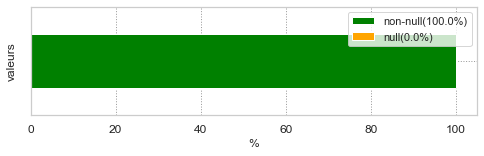

In [64]:
verifier_taille(df)

# Analyse Exploratoire

## Distributions

In [65]:
df.describe()

Freshness(R)  multi_orders(F)  payment_value(M)  review_score(S)  \
count  91476.000000     91476.000000      91476.000000     91476.000000   
mean       0.659525         0.029571        159.757882         4.151635   
std        0.219601         0.169400        218.129032         1.280064   
min        0.000000         0.000000          9.000000         1.000000   
25%        0.503616         0.000000         62.000000         4.000000   
50%        0.686976         0.000000        105.000000         5.000000   
75%        0.837279         0.000000        176.000000         5.000000   
max        1.000000         1.000000      13664.000000         5.000000   

            daytime       weekday         month  orders_volume  \
count  91476.000000  91476.000000  91476.000000   91476.000000   
mean       2.349753      2.750525      6.032730       1.188027   
std        1.304555      1.958319      3.204851       0.829505   
min        0.000000      0.000000      1.000000       1.000000   
25%        1.000000      1.000000      3.000000       1.000000   
50%        2.000000      3.000000      6.000000       1.000000   
75%        4.000000      4.000000      8.000000       1.000000   
max        4.000000      6.000000     12.000000      52.000000   

       payment_sequential  payment_installments  
count        91476.000000          91476.000000  
mean             1.044602              2.916109  
std              0.368061              2.702698  
min              1.000000              0.000000  
25%              1.000000              1.000000  
50%              1.000000              2.000000  
75%              1.000000              4.000000  
max             26.000000             24.000000

In [66]:
df.loc[df['payment_installments']==0, :]

customer_unique_id  Freshness(R)  multi_orders(F)  \
54755  9925e1d7dff0d807355599dee04830ab      0.847549                0   
87722  f54cea27c80dc09bfe07b1cf1e01b845      0.814161                0   

       payment_value(M)  review_score(S)  daytime  weekday  month  \
54755             129.0              5.0        2        1      5   
87722              58.0              5.0        1        6      4   

       orders_volume  product_category_name payment_type  payment_sequential  \
54755              2  utilidades_domesticas  credit_card                   2   
87722              1              telefonia  credit_card                   2   

       payment_installments customer_state  
54755                     0             BA  
87722                     0             SP

In [67]:
df.loc[df['payment_installments']==0, 'payment_installments'] = 1
dfe.loc[df['payment_installments']==0, 'payment_installments'] = 1

In [68]:
dfe.describe()

Freshness(R)  multi_orders(F)  payment_value(M)  review_score(S)  \
count  91476.000000     91476.000000      91476.000000     91476.000000   
mean       0.659525         0.029571        159.757882         4.151635   
std        0.219601         0.169400        218.129032         1.280064   
min        0.000000         0.000000          9.000000         1.000000   
25%        0.503616         0.000000         62.000000         4.000000   
50%        0.686976         0.000000        105.000000         5.000000   
75%        0.837279         0.000000        176.000000         5.000000   
max        1.000000         1.000000      13664.000000         5.000000   

            daytime       weekday         month  orders_volume  \
count  91476.000000  91476.000000  91476.000000   91476.000000   
mean       2.349753      2.750525      6.032730       1.188027   
std        1.304555      1.958319      3.204851       0.829505   
min        0.000000      0.000000      1.000000       1.000000   
25%        1.000000      1.000000      3.000000       1.000000   
50%        2.000000      3.000000      6.000000       1.000000   
75%        4.000000      4.000000      8.000000       1.000000   
max        4.000000      6.000000     12.000000      52.000000   

       payment_sequential  payment_installments  ptype_boleto  \
count        91476.000000          91476.000000  91476.000000   
mean             1.043826              2.913781      0.200523   
std              0.361487              2.692244      0.400394   
min              1.000000              0.000000      0.000000   
25%              1.000000              1.000000      0.000000   
50%              1.000000              2.000000      0.000000   
75%              1.000000              4.000000      0.000000   
max             26.000000             24.000000      1.000000   

       ptype_credit_card  ptype_debit_card  ptype_voucher  \
count       91476.000000      91476.000000   91476.000000   
mean            0.760669          0.015709       0.026903   
std             0.426677          0.124348       0.161802   
min             0.000000          0.000000       0.000000   
25%             1.000000          0.000000       0.000000   
50%             1.000000          0.000000       0.000000   
75%             1.000000          0.000000       0.000000   
max             1.000000          1.000000       1.000000   

       pcategory_agro_industria_e_comercio  pcategory_alimentos  \
count                         91476.000000         91476.000000   
mean                              0.001924             0.004668   
std                               0.043821             0.068163   
min                               0.000000             0.000000   
25%                               0.000000             0.000000   
50%                               0.000000             0.000000   
75%                               0.000000             0.000000   
max                               1.000000             1.000000   

       pcategory_alimentos_bebidas  pcategory_artes  \
count                 91476.000000     91476.000000   
mean                      0.002361         0.002066   
std                       0.048536         0.045408   
min                       0.000000         0.000000   
25%                       0.000000         0.000000   
50%                       0.000000         0.000000   
75%                       0.000000         0.000000   
max                       1.000000         1.000000   

       pcategory_artes_e_artesanato  pcategory_artigos_de_festas  \
count                  91476.000000                 91476.000000   
mean                       0.000219                     0.000415   
std                        0.014785                     0.020377   
min                        0.000000                     0.000000   
25%                        0.000000                     0.000000   
50%                        0.000000                     0.000000   
75%                     

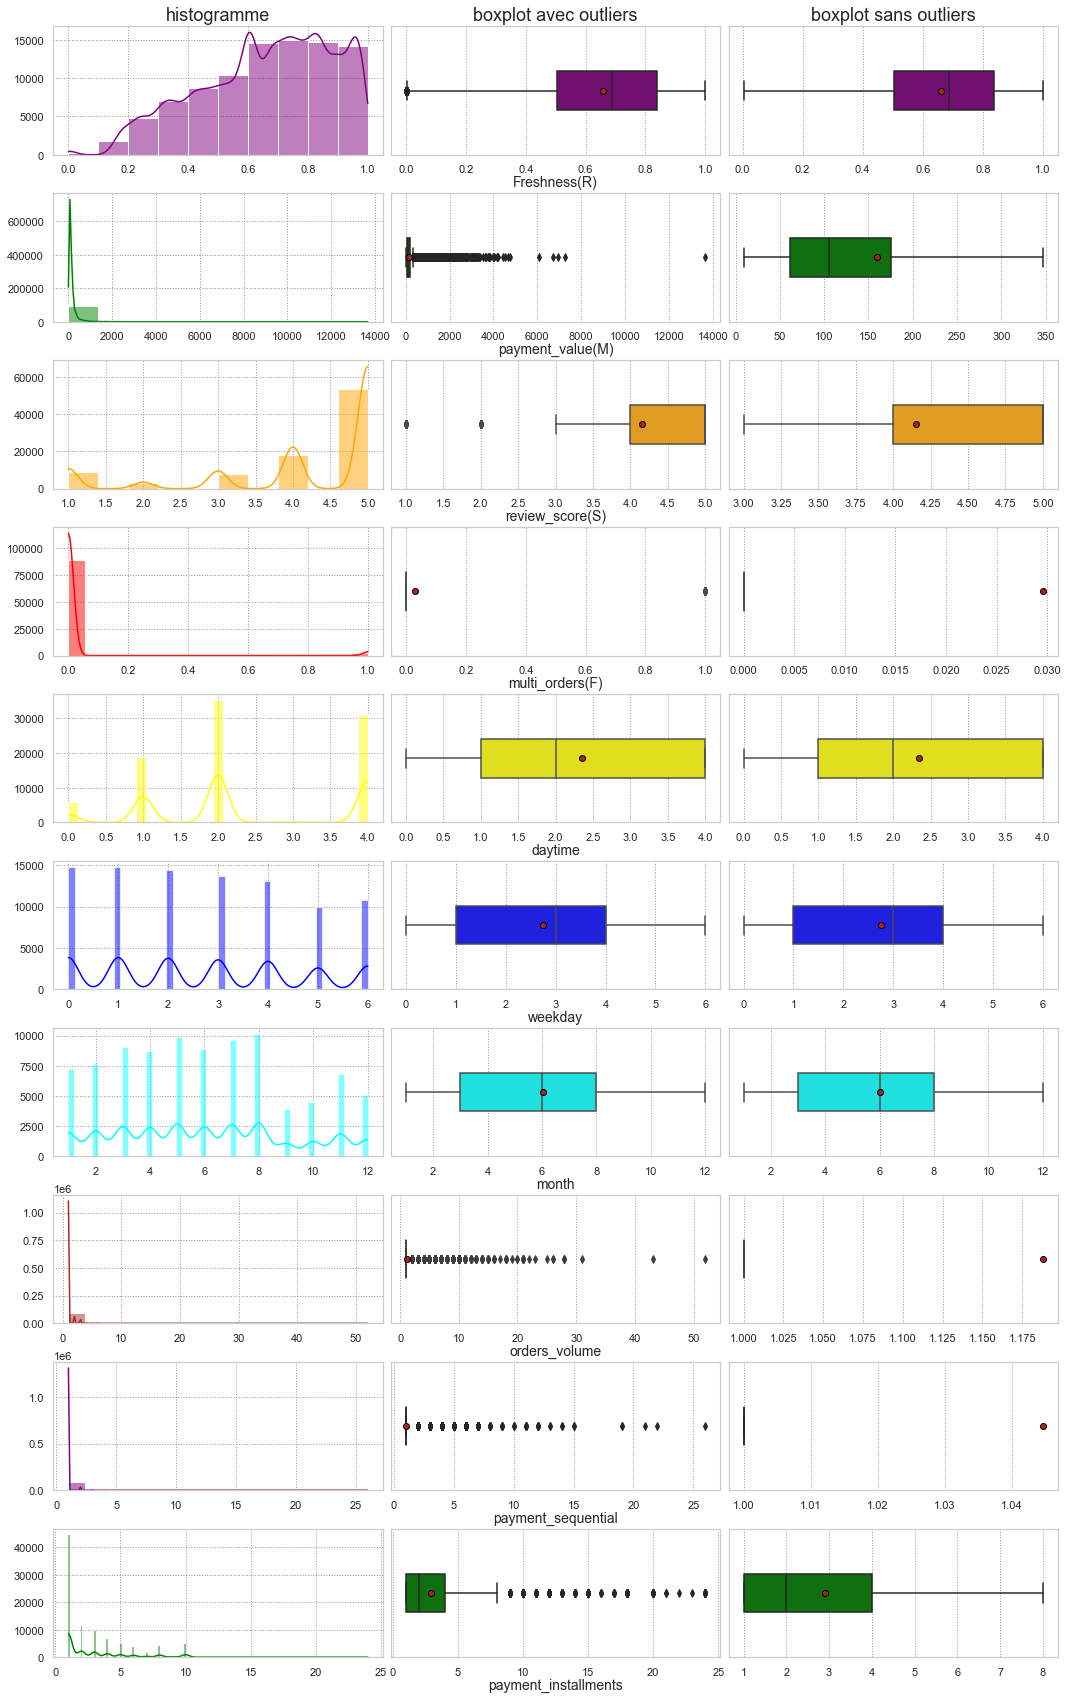

In [69]:
histo_distribution(df)

## Correlaions

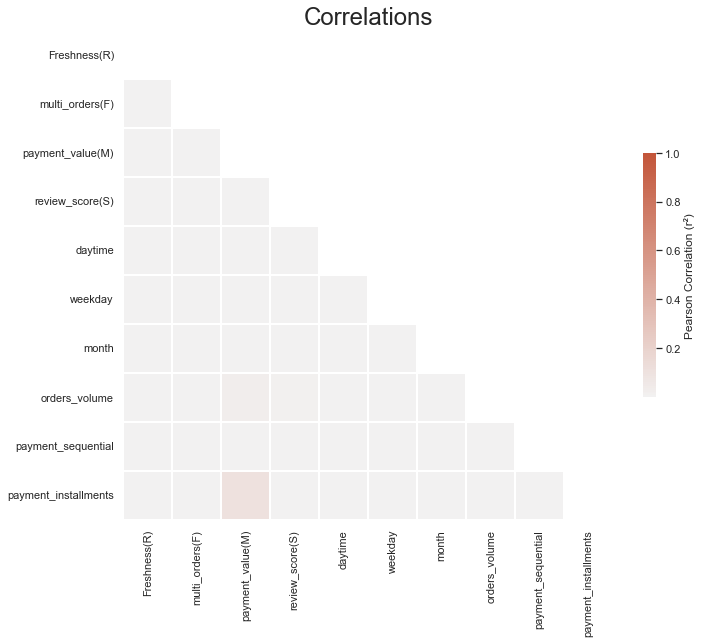

In [70]:
correlation_matrix(df)

## ANOVA

In [71]:
# X = 'payment_type'
# ANOVA(df, X, yloc=0.92, hspace=0.55, width=7, heigth=0.7)

In [72]:
# X = 'customer_state'
# ANOVA(df, X, yloc=0.88, hspace=0.1, width=12, heigth=0.3)

In [73]:
# X = 'product_category_name'
# ANOVA(df, X, yloc=0.92, hspace=0.55, width=7, heigth=0.7)

## CHi2

p-value is:  5.1019753730613234e-48
chi=418.327962, critical value=99.616927
At 0.05 level of significance, we reject the null hypotheses and accept H1. 
    They are not independent.


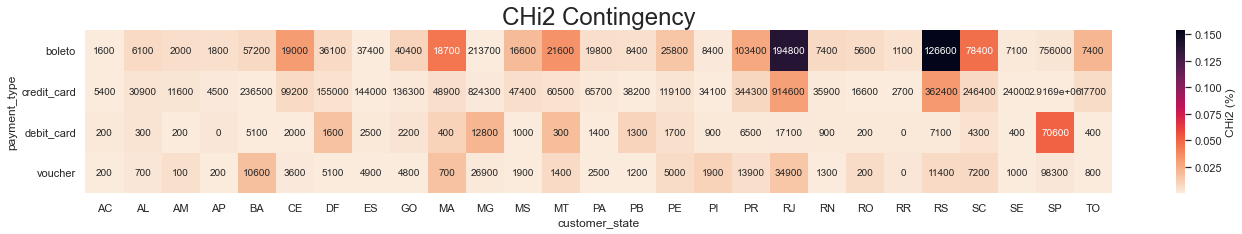

In [74]:
chi2(df, 'payment_type', 'customer_state', heigth=3, width=23)

In [75]:
dfe.head(5)

customer_unique_id  Freshness(R)  multi_orders(F)  \
0  0000366f3b9a7992bf8c76cfdf3221e2      0.840025                0   
1  0000b849f77a49e4a4ce2b2a4ca5be3f      0.835723                0   
2  0000f46a3911fa3c0805444483337064      0.227613                0   
3  0000f6ccb0745a6a4b88665a16c9f078      0.538405                0   
4  0004aac84e0df4da2b147fca70cf8255      0.585848                0   

   payment_value(M)  review_score(S)  daytime  weekday  month  orders_volume  \
0             141.0              5.0        1        3      5              1   
1              27.0              4.0        1        0      5              1   
2              86.0              3.0        4        4      3              1   
3              43.0              4.0        4        3     10              1   
4             196.0              5.0        4        1     11              1   

   payment_sequential  payment_installments  ptype_boleto  ptype_credit_card  \
0                   1                     8             0                  1   
1                   1                     1             0                  1   
2                   1                     8             0                  1   
3                   1                     4             0                  1   
4                   1                     6             0                  1   

   ptype_debit_card  ptype_voucher  pcategory_agro_industria_e_comercio  \
0                 0              0                                    0   
1                 0              0                                    0   
2                 0              0                                    0   
3                 0              0                                    0   
4                 0              0                                    0   

   pcategory_alimentos  pcategory_alimentos_bebidas  pcategory_artes  \
0                    0                            0                0   
1                    0                            0                0   
2                    0                            0                0   
3                    0                            0                0   
4                    0                            0                0   

   pcategory_artes_e_artesanato  pcategory_artigos_de_festas  \
0                             0                            0   
1                             0                            0   
2                             0                            0   
3                             0                            0   
4                             0                            0   

   pcategory_artigos_de_natal  pcategory_audio  pcategory_automotivo  \
0                           0                0                     0   
1                           0                0                     0   
2                           0                0                     0   
3                           0                0                     0   
4                           0                0                     0   

   pcategory_bebes  pcategory_bebidas  pcategory_beleza_saude  \
0                0                  0                       0   
1                0                  0                       1   
2                0                  0                       0   
3                0                  0                       0   
4                0                  0                       0   

   pcategory_brinquedos  pcategory_cama_mesa_banho  pcategory_casa_conforto  \
0                     0                          1                        0   
1                     0                          0                        0   
2                     0                          0                        0   
3                     0                          0                        0   
4                     0                          0                        0   

   pcategory_casa_conforto_2  pcategory_casa_construcao  \
0      

## Components Analysis

In [76]:
df.head(5)

customer_unique_id  Freshness(R)  multi_orders(F)  \
0  0000366f3b9a7992bf8c76cfdf3221e2      0.840025                0   
1  0000b849f77a49e4a4ce2b2a4ca5be3f      0.835723                0   
2  0000f46a3911fa3c0805444483337064      0.227613                0   
3  0000f6ccb0745a6a4b88665a16c9f078      0.538405                0   
4  0004aac84e0df4da2b147fca70cf8255      0.585848                0   

   payment_value(M)  review_score(S)  daytime  weekday  month  orders_volume  \
0             141.0              5.0        1        3      5              1   
1              27.0              4.0        1        0      5              1   
2              86.0              3.0        4        4      3              1   
3              43.0              4.0        4        3     10              1   
4             196.0              5.0        4        1     11              1   

  product_category_name payment_type  payment_sequential  \
0       cama_mesa_banho  credit_card                   1   
1          beleza_saude  credit_card                   1   
2             papelaria  credit_card                   1   
3             telefonia  credit_card                   1   
4             telefonia  credit_card                   1   

   payment_installments customer_state  
0                     8             SP  
1                     1             SP  
2                     8             SC  
3                     4             PA  
4                     6             SP

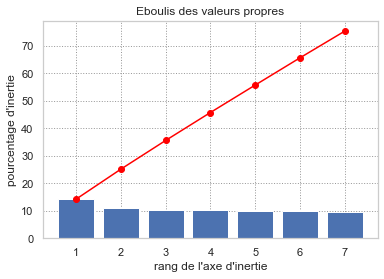

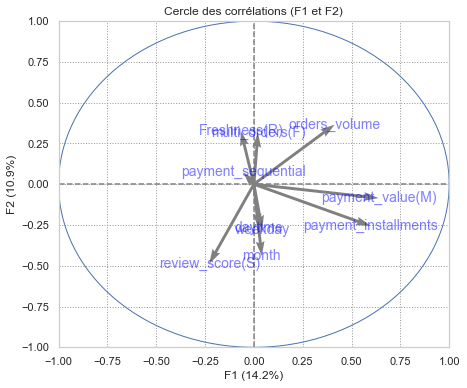

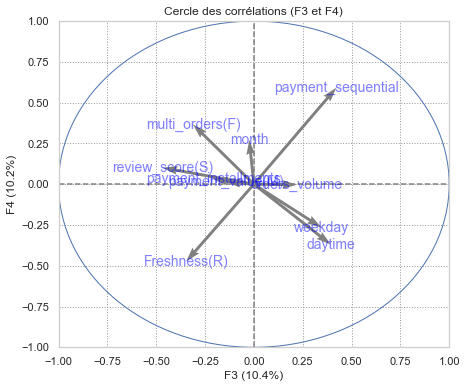

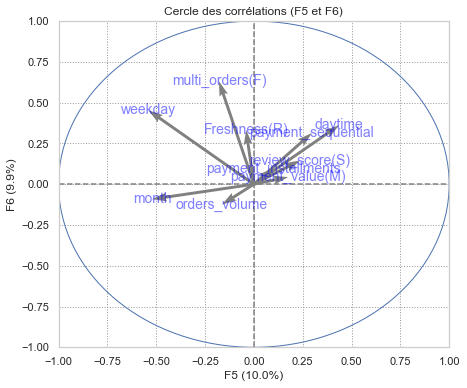

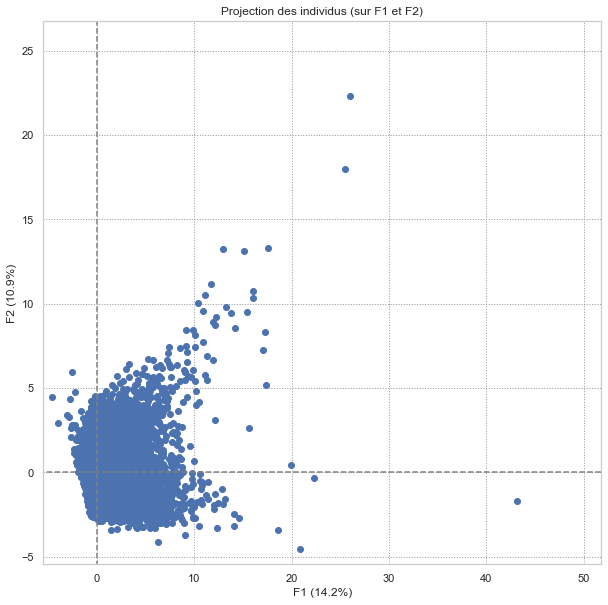

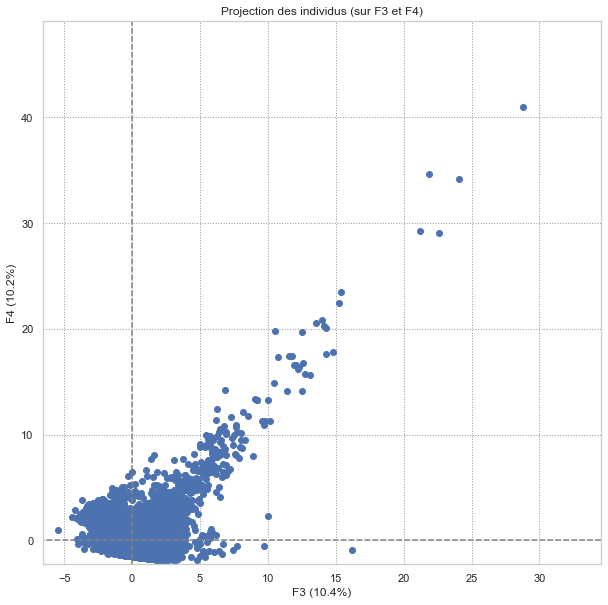

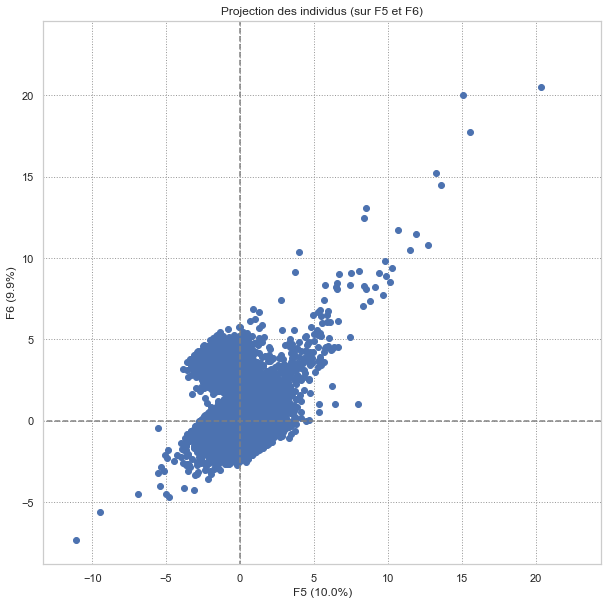

In [77]:
X = df
pcs = PCA(X, 7, enable_display_circles=True)

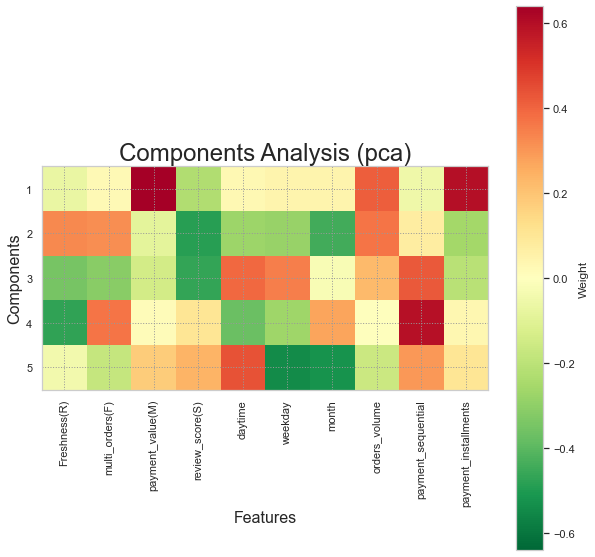

In [78]:
X = df.iloc[:, 1:]
cps = ComponentsAnalysis(X, n_comp=5, method='pca', heigth=10)

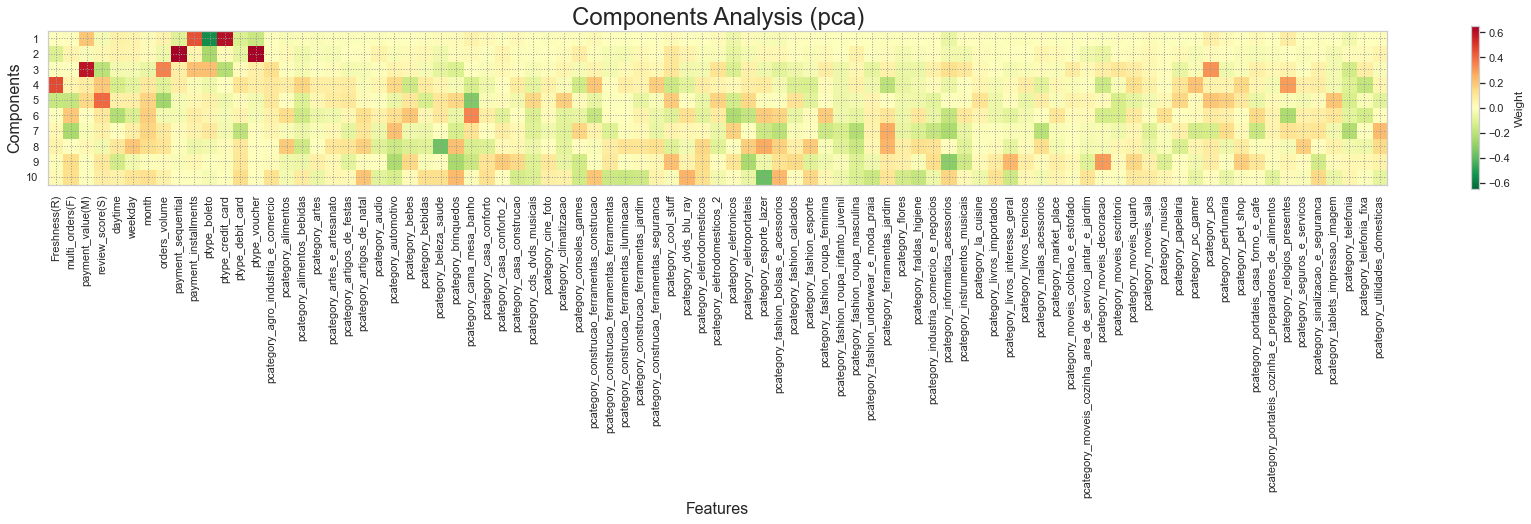

In [79]:
X = dfe.iloc[:, 1:]
cps = ComponentsAnalysis(X, n_comp=10, method='pca', heigth=3, width=30)

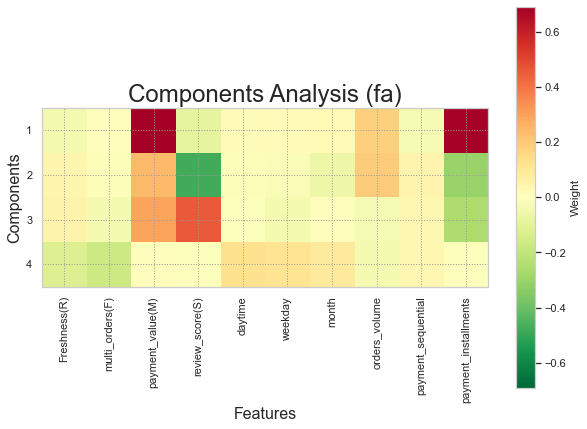

In [80]:
X = df.iloc[:, 1:]
cps = ComponentsAnalysis(X, n_comp=4, method='fa', heigth=7)

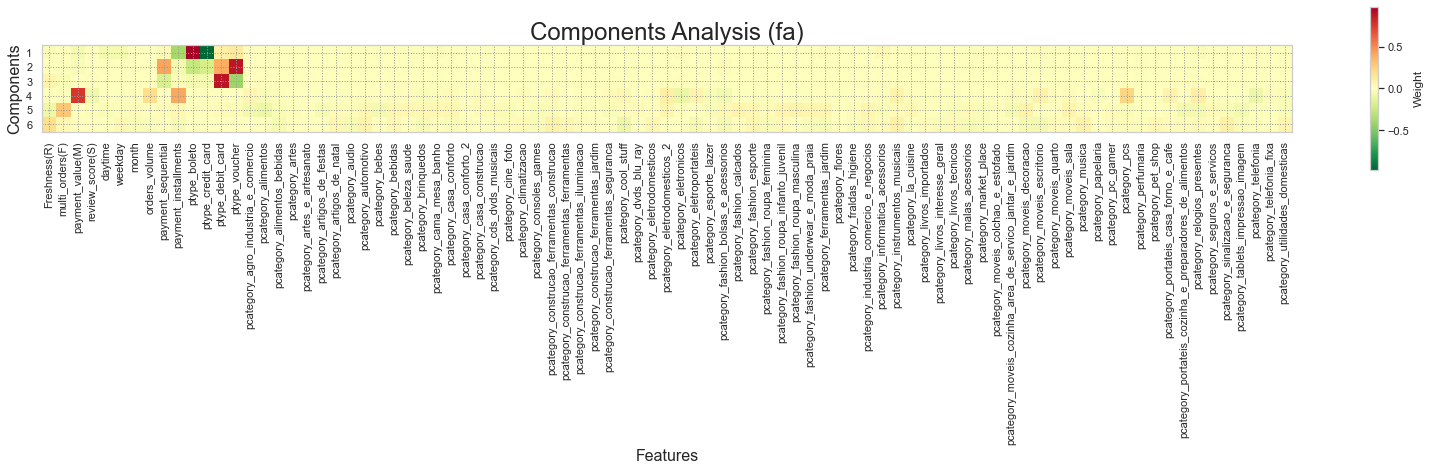

In [81]:
X = dfe.iloc[:, 1:]
cps = ComponentsAnalysis(X, n_comp=6, method='fa', heigth=3, width=28)

c:\Users\el-ha\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "


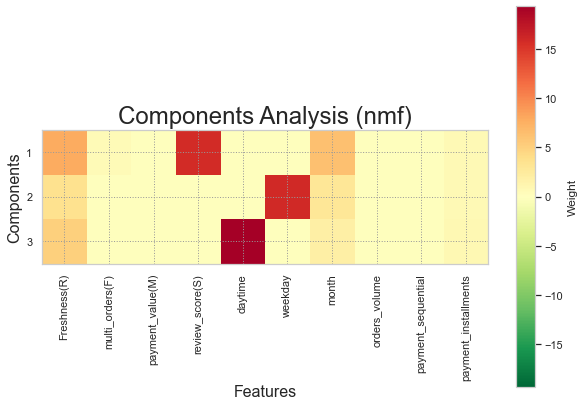

In [82]:
X = df.iloc[:, 1:]
cps = ComponentsAnalysis(X, n_comp=3, method='nmf', heigth=7)

c:\Users\el-ha\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:312: FutureWarning: The 'init' value, when 'init=None' and n_components is less than n_samples and n_features, will be changed from 'nndsvd' to 'nndsvda' in 1.1 (renaming of 0.26).
  warnings.warn(("The 'init' value, when 'init=None' and "
c:\Users\el-ha\anaconda3\lib\site-packages\sklearn\decomposition\_nmf.py:1090: ConvergenceWarning: Maximum number of iterations 200 reached. Increase it to improve convergence.
  warnings.warn("Maximum number of iterations %d reached. Increase it to"


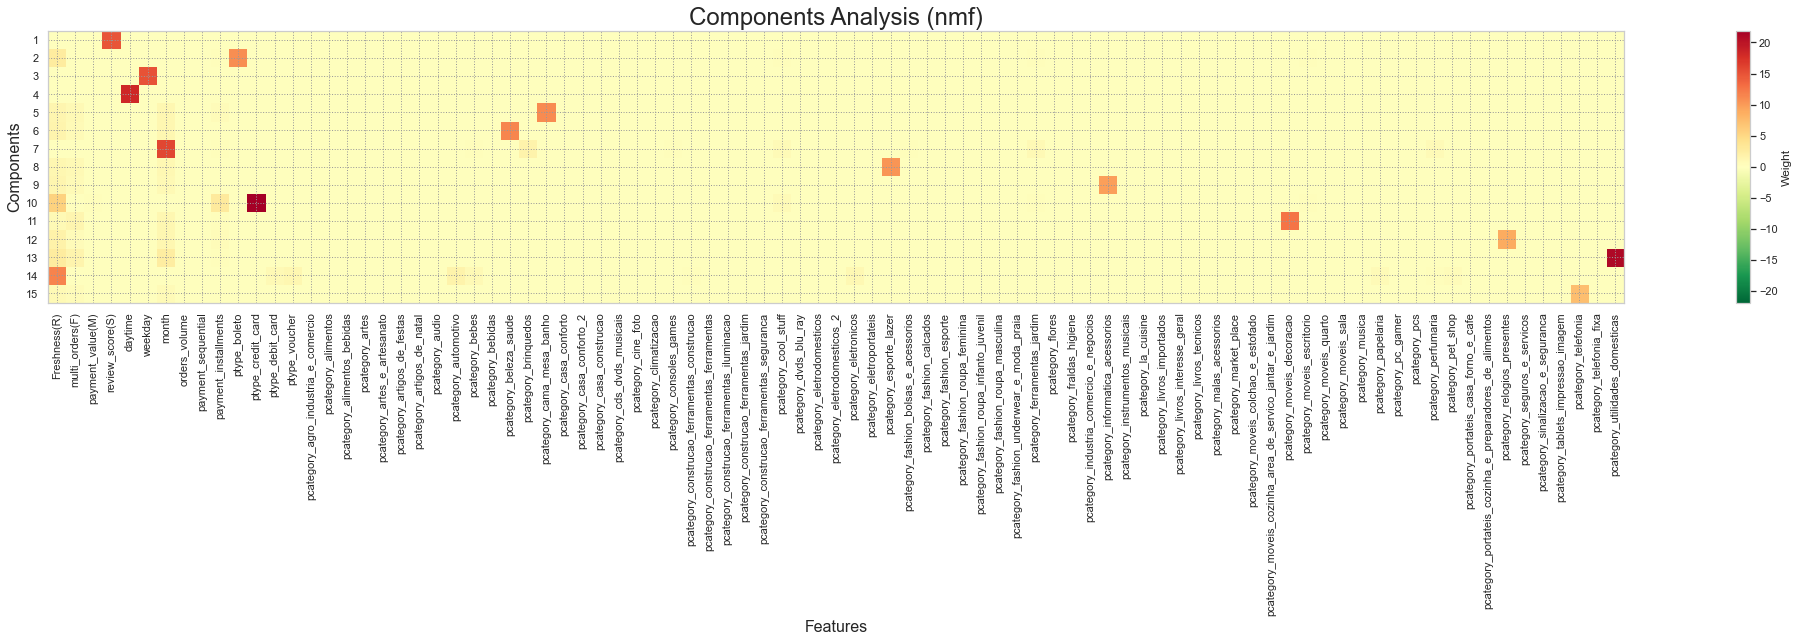

In [83]:
X = dfe.iloc[:, 1:]
cps = ComponentsAnalysis(X, n_comp=15, method='nmf', heigth=5, width=40)

# Clustering

In [84]:
dfm = df.iloc[:,:10]
dfm

customer_unique_id  Freshness(R)  multi_orders(F)  \
0      0000366f3b9a7992bf8c76cfdf3221e2      0.840025                0   
1      0000b849f77a49e4a4ce2b2a4ca5be3f      0.835723                0   
2      0000f46a3911fa3c0805444483337064      0.227613                0   
3      0000f6ccb0745a6a4b88665a16c9f078      0.538405                0   
4      0004aac84e0df4da2b147fca70cf8255      0.585848                0   
...                                 ...           ...              ...   
91471  fffcf5a5ff07b0908bd4e2dbc735a684      0.357120                0   
91472  fffea47cd6d3cc0a88bd621562a9d061      0.623285                0   
91473  ffff371b4d645b6ecea244b27531430a      0.182688                0   
91474  ffff5962728ec6157033ef9805bacc48      0.828774                0   
91475  ffffd2657e2aad2907e67c3e9daecbeb      0.303834                0   

       payment_value(M)  review_score(S)  daytime  weekday  month  \
0                 141.0              5.0        1        3      5   
1                  27.0              4.0        1        0      5   
2                  86.0              3.0        4        4      3   
3                  43.0              4.0        4        3     10   
4                 196.0              5.0        4        1     11   
...                 ...              ...      ...      ...    ...   
91471            2067.0              5.0        4        3      6   
91472              84.0              4.0        4        6     12   
91473             112.0              5.0        2        1      2   
91474             133.0              5.0        2        2      5   
91475              71.0              5.0        4        1      5   

       orders_volume product_category_name  
0                  1       cama_mesa_banho  
1                  1          beleza_saude  
2                  1             papelaria  
3                  1             telefonia  
4                  1             telefonia  
...              ...                   ...  
91471              3          beleza_saude  
91472              1                 bebes  
91473              1            automotivo  
91474              1    relogios_presentes  
91475              1            perfumaria  

[91476 rows x 10 columns]

In [94]:
from sklearn.metrics import davies_bouldin_score, silhouette_score

## K-Means++ 

In [95]:
from sklearn.cluster import KMeans

# Nombre de clusters souhaités (taux  de compression)
data = df[colsOfType(df)] # garder les colonnes numériques uniquement
n_clust = 5 

# préparation des données pour le clustering
X = data.values
X_scaled,scaler = Std_Scaled(X, return_scaler=True)

# Clustering par K-means
km = KMeans(n_clusters=n_clust, random_state=0, init='k-means++')
km_X = km.fit(X_scaled)
labels= km_X.labels_
print('davies_bouldin_score:', davies_bouldin_score(X, labels))
print('silhouette_score:', silhouette_score(X, labels))

X = df
pcs = PCA(X, 7, discrete_illustrative_var=labels, enable_display_circles=False, enable_display_scree_plot=False)

davies_bouldin_score: 19.744885039057696


## DBSCAN

davies_bouldin_score: 38.21729677406253


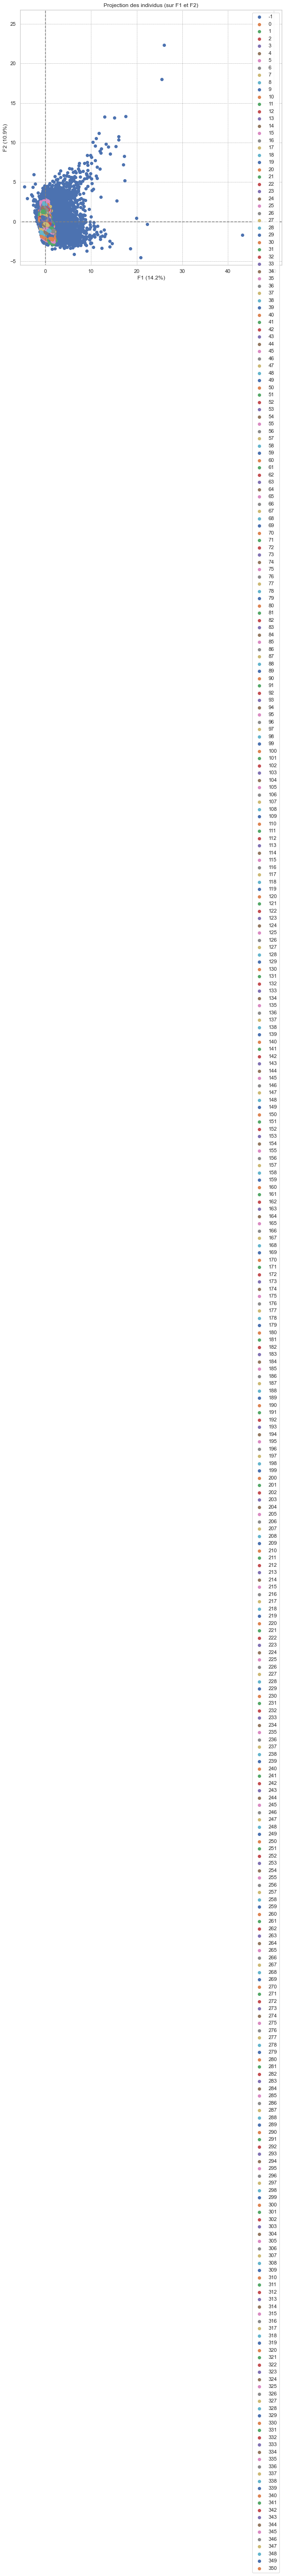

c:\Users\el-ha\anaconda3\lib\site-packages\IPython\core\pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


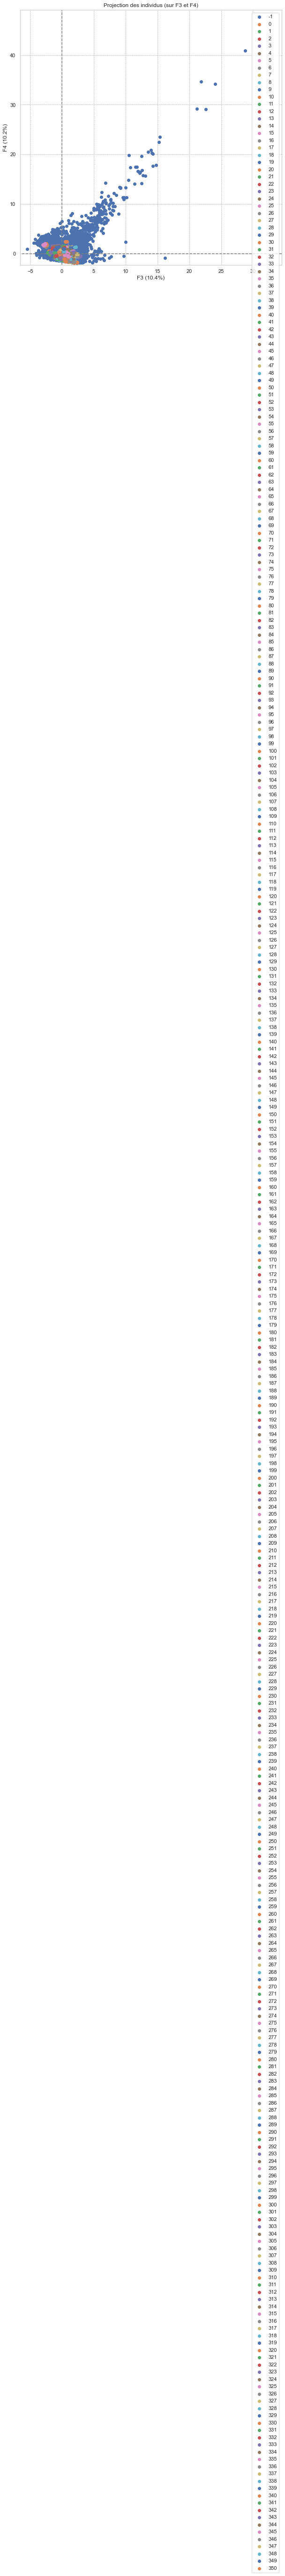

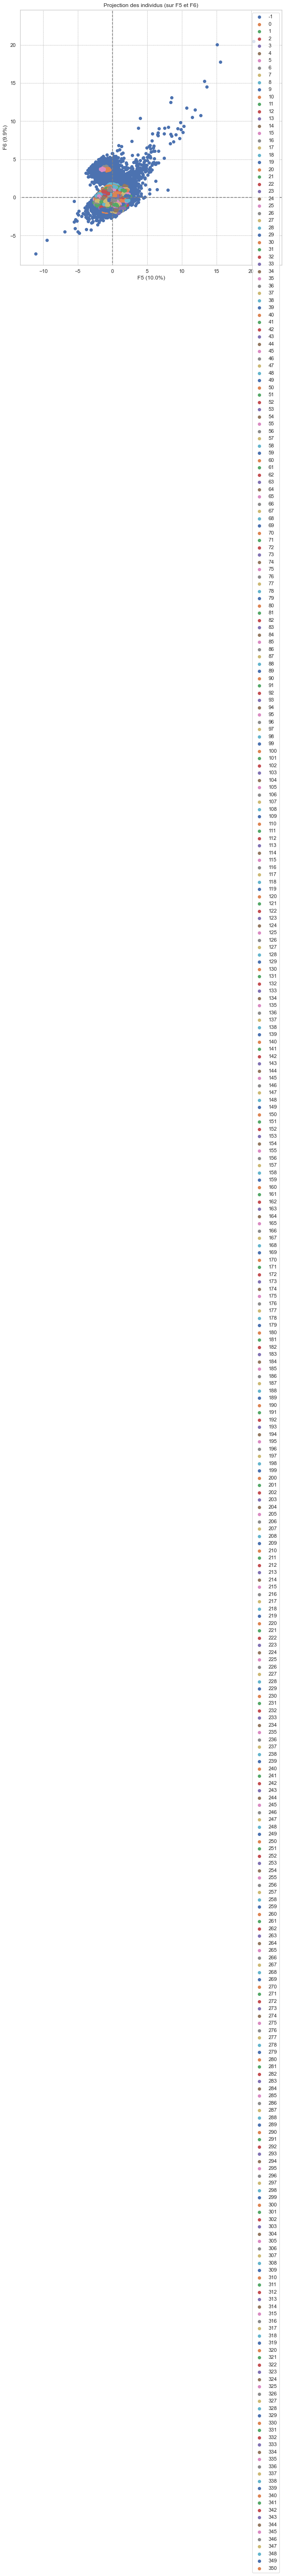

In [92]:
from sklearn.cluster import DBSCAN


# Nombre de clusters souhaités (taux  de compression)
data = df[colsOfType(df)] # garder les colonnes numériques uniquement
n_clust = 5 

# préparation des données pour le clustering
X = data.values
X_scaled,scaler = Std_Scaled(X, return_scaler=True)

# Clustering par K-means
dbs = DBSCAN(min_samples=10, n_jobs=-1)
dbs_X = dbs.fit(X_scaled)
labels= dbs_X.labels_
print('davies_bouldin_score:', davies_bouldin_score(X, labels))
print('silhouette_score:', silhouette_score(X, labels))

X = df
pcs = PCA(X, 7, discrete_illustrative_var=labels, enable_display_circles=False, enable_display_scree_plot=False)